Ryzyko wystąpienia cukrzycy:
1. [Import bibliotek](#1)  
2. [Analiza danych](#2)  
    2.1 [Wczytanie danych](#21)  
    2.2 [Opisanie cech struktury danych](#22)  
    2.3 [Analiza statystyczna danych](#23)  
3. [Wizualizacja danych](#3)  
4. [Przygotowanie danych](#4)  
    4.1 [Zmiana wartości zerowych](#41)  
5. [Podział danych](#5)  
    5.1 [Podział danych na zbiór treningowy i testowy](#51)  
    5.2 [Standaryzacja i normalizacja danych](#52)  
6. [Modelowanie predykcyjne (pełny zbiór atrybutów) ](#6)  
    6.1 [Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową](#61)  
    6.2 [Dobór najlepszych hiperparametrów](#62)  
    6.3 [Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli](#63)  
7. [Modelowanie predykcyjne na zbiorze danych po usunięciu atrybutów o niskiej korelacji ](#7)  
    7.1 [Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową](#71)  
    7.2 [Dobór najlepszych hiperparametrów](#72)  
    7.3 [Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli](#73)  
8. [Modelowanie predykcyjne na zbiorze danych po zastosowaniu redukcji wymiarowości techniką PCA) ](#8)  
    8.1 [Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową](#81)  
    8.2 [Dobór najlepszych hiperparametrów](#82)  
    8.3 [Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli](#83)  
9. [Modelowanie predykcyjne na zbiorze danych po zastosowaniu oversamplingu) ](#9)  
    9.1 [Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową](#91)  
    9.2 [Dobór najlepszych hiperparametrów](#92)  
    9.3 [Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli](#93)  
10. [Wnioski](#10)  
    10.1 [Podsumowanie wyników projektu](#101)  
    10.2 [Wnioski z wyników projektu](#102) 

#### <a name='1'></a> 1. Import bibliotek


In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

#### <a name='2'></a> 2. Analiza danych 

#### <a name='21'></a> 2.1 Wczytanie danych 

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.rename(columns={'Pregnancies':'Liczba ciąż', 'Glucose':'Stężenie glukozy','BloodPressure':'Ciśnienie krwi',
                         'SkinThickness':'Grubość fałdu skórnego','Insulin':'Stężenie insuliny','BMI':'BMI',
                         'DiabetesPedigreeFunction':'Wspólczynnik dziedziczności','Age':'Wiek', 'Outcome':'Prognoza'},
                inplace= True)

In [4]:
diabetes_copy = diabetes.copy()
diabetes_copy

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

In [5]:
diabetes_red = diabetes.copy() # zamrożenie danych do redukcji wymiarowosci
diabetes_cos = diabetes.copy() # zamrożenie danych do redukcji wymiarów PCA
diabetes_over = diabetes.copy() # zamrożenie danych do oversamplingu

In [6]:
diabetes_over

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

#### <a name='22'></a> 2.2 Opisanie cech i struktury danych

In [7]:
diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Liczba ciąż                  768 non-null    int64  
 1   Stężenie glukozy             768 non-null    int64  
 2   Ciśnienie krwi               768 non-null    int64  
 3   Grubość fałdu skórnego       768 non-null    int64  
 4   Stężenie insuliny            768 non-null    int64  
 5   BMI                          768 non-null    float64
 6   Wspólczynnik dziedziczności  768 non-null    float64
 7   Wiek                         768 non-null    int64  
 8   Prognoza                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


W danych nie ma brakujących wartości. Brak zmiennych kategorycznych.

In [8]:
zeros_count = (diabetes == 0).sum()
zeros_count 

Liczba ciąż                    111
Stężenie glukozy                 5
Ciśnienie krwi                  35
Grubość fałdu skórnego         227
Stężenie insuliny              374
BMI                             11
Wspólczynnik dziedziczności      0
Wiek                             0
Prognoza                       500
dtype: int64

In [9]:
diabetes

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

In [10]:
duplic = diabetes.duplicated()

print(diabetes[duplic])

Empty DataFrame
Columns: [Liczba ciąż, Stężenie glukozy, Ciśnienie krwi, Grubość fałdu skórnego, Stężenie insuliny, BMI, Wspólczynnik dziedziczności, Wiek, Prognoza]
Index: []


W zbiorze nie ma duplikatów

#### <a name='23'></a> 2.3 Analiza statystyczna danych

In [11]:
diabetes.describe()

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
count   768.000000        768.000000      768.000000              768.000000   
mean      3.845052        120.894531       69.105469               20.536458   
std       3.369578         31.972618       19.355807               15.952218   
min       0.000000          0.000000        0.000000                0.000000   
25%       1.000000         99.000000       62.000000                0.000000   
50%       3.000000        117.000000       72.000000               23.000000   
75%       6.000000        140.250000       80.000000               32.000000   
max      17.000000        199.000000      122.000000               99.000000   

       Stężenie insuliny         BMI  Wspólczynnik dziedziczności        Wiek  \
count         768.000000  768.000000                   768.000000  768.000000   
mean           79.799479   31.992578                     0.471876   33.240885   
std           115.244002    7.884160                     0.331329   11.760232   
min             0.000000    0.000000                     0.078000   21.000000   
25%             0.000000   27.300000                     0.243750   24.000000   
50%            30.500000   32.000000                     0.372500   29.000000   
75%           127.250000   36.600000                     0.626250   41.000000   
max           846.000000   67.100000                     2.420000   81.000000   

         Prognoza  
count  768.000000  
mean     0.348958  
std      0.476951  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

Wartości zerowe dla grubosci fałdu skórnego i stężenia insuliny na 25tym percentylu oznaczają że minimum 25% danych ma wartość zero.


In [12]:
corr_matrix_diabetes = diabetes.corr() 
corr_matrix_diabetes['Prognoza'].sort_values(ascending=False)

Prognoza                       1.000000
Stężenie glukozy               0.466581
BMI                            0.292695
Wiek                           0.238356
Liczba ciąż                    0.221898
Wspólczynnik dziedziczności    0.173844
Stężenie insuliny              0.130548
Grubość fałdu skórnego         0.074752
Ciśnienie krwi                 0.065068
Name: Prognoza, dtype: float64

W przypadku korelacji danych wzgledem wartości prognozowanej najwyższa korelacja wystepuje pomiędzy prognozą wystapienia cukrzycy a steżeniem glukozy, nastepnie pomiędzy BMI, wiekiem i liczbą ciąż. Obserwowane korelacje są niskie.

<AxesSubplot:>

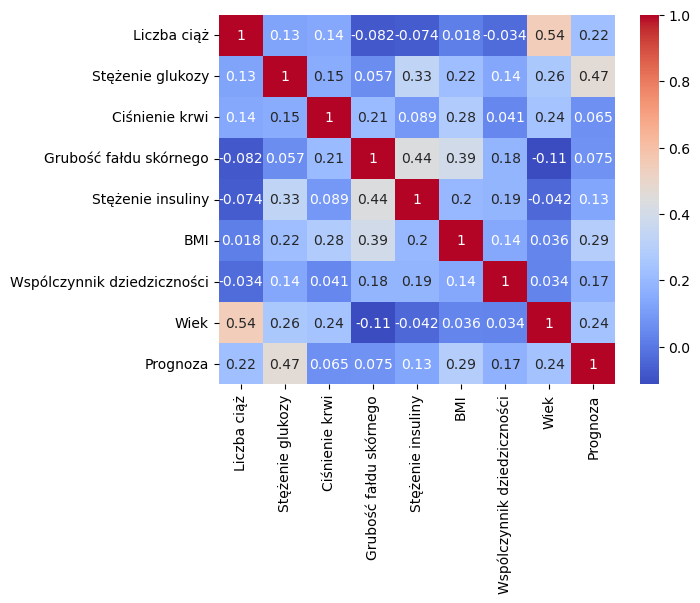

In [13]:
sns.heatmap(corr_matrix_diabetes, annot=True, cmap='coolwarm')

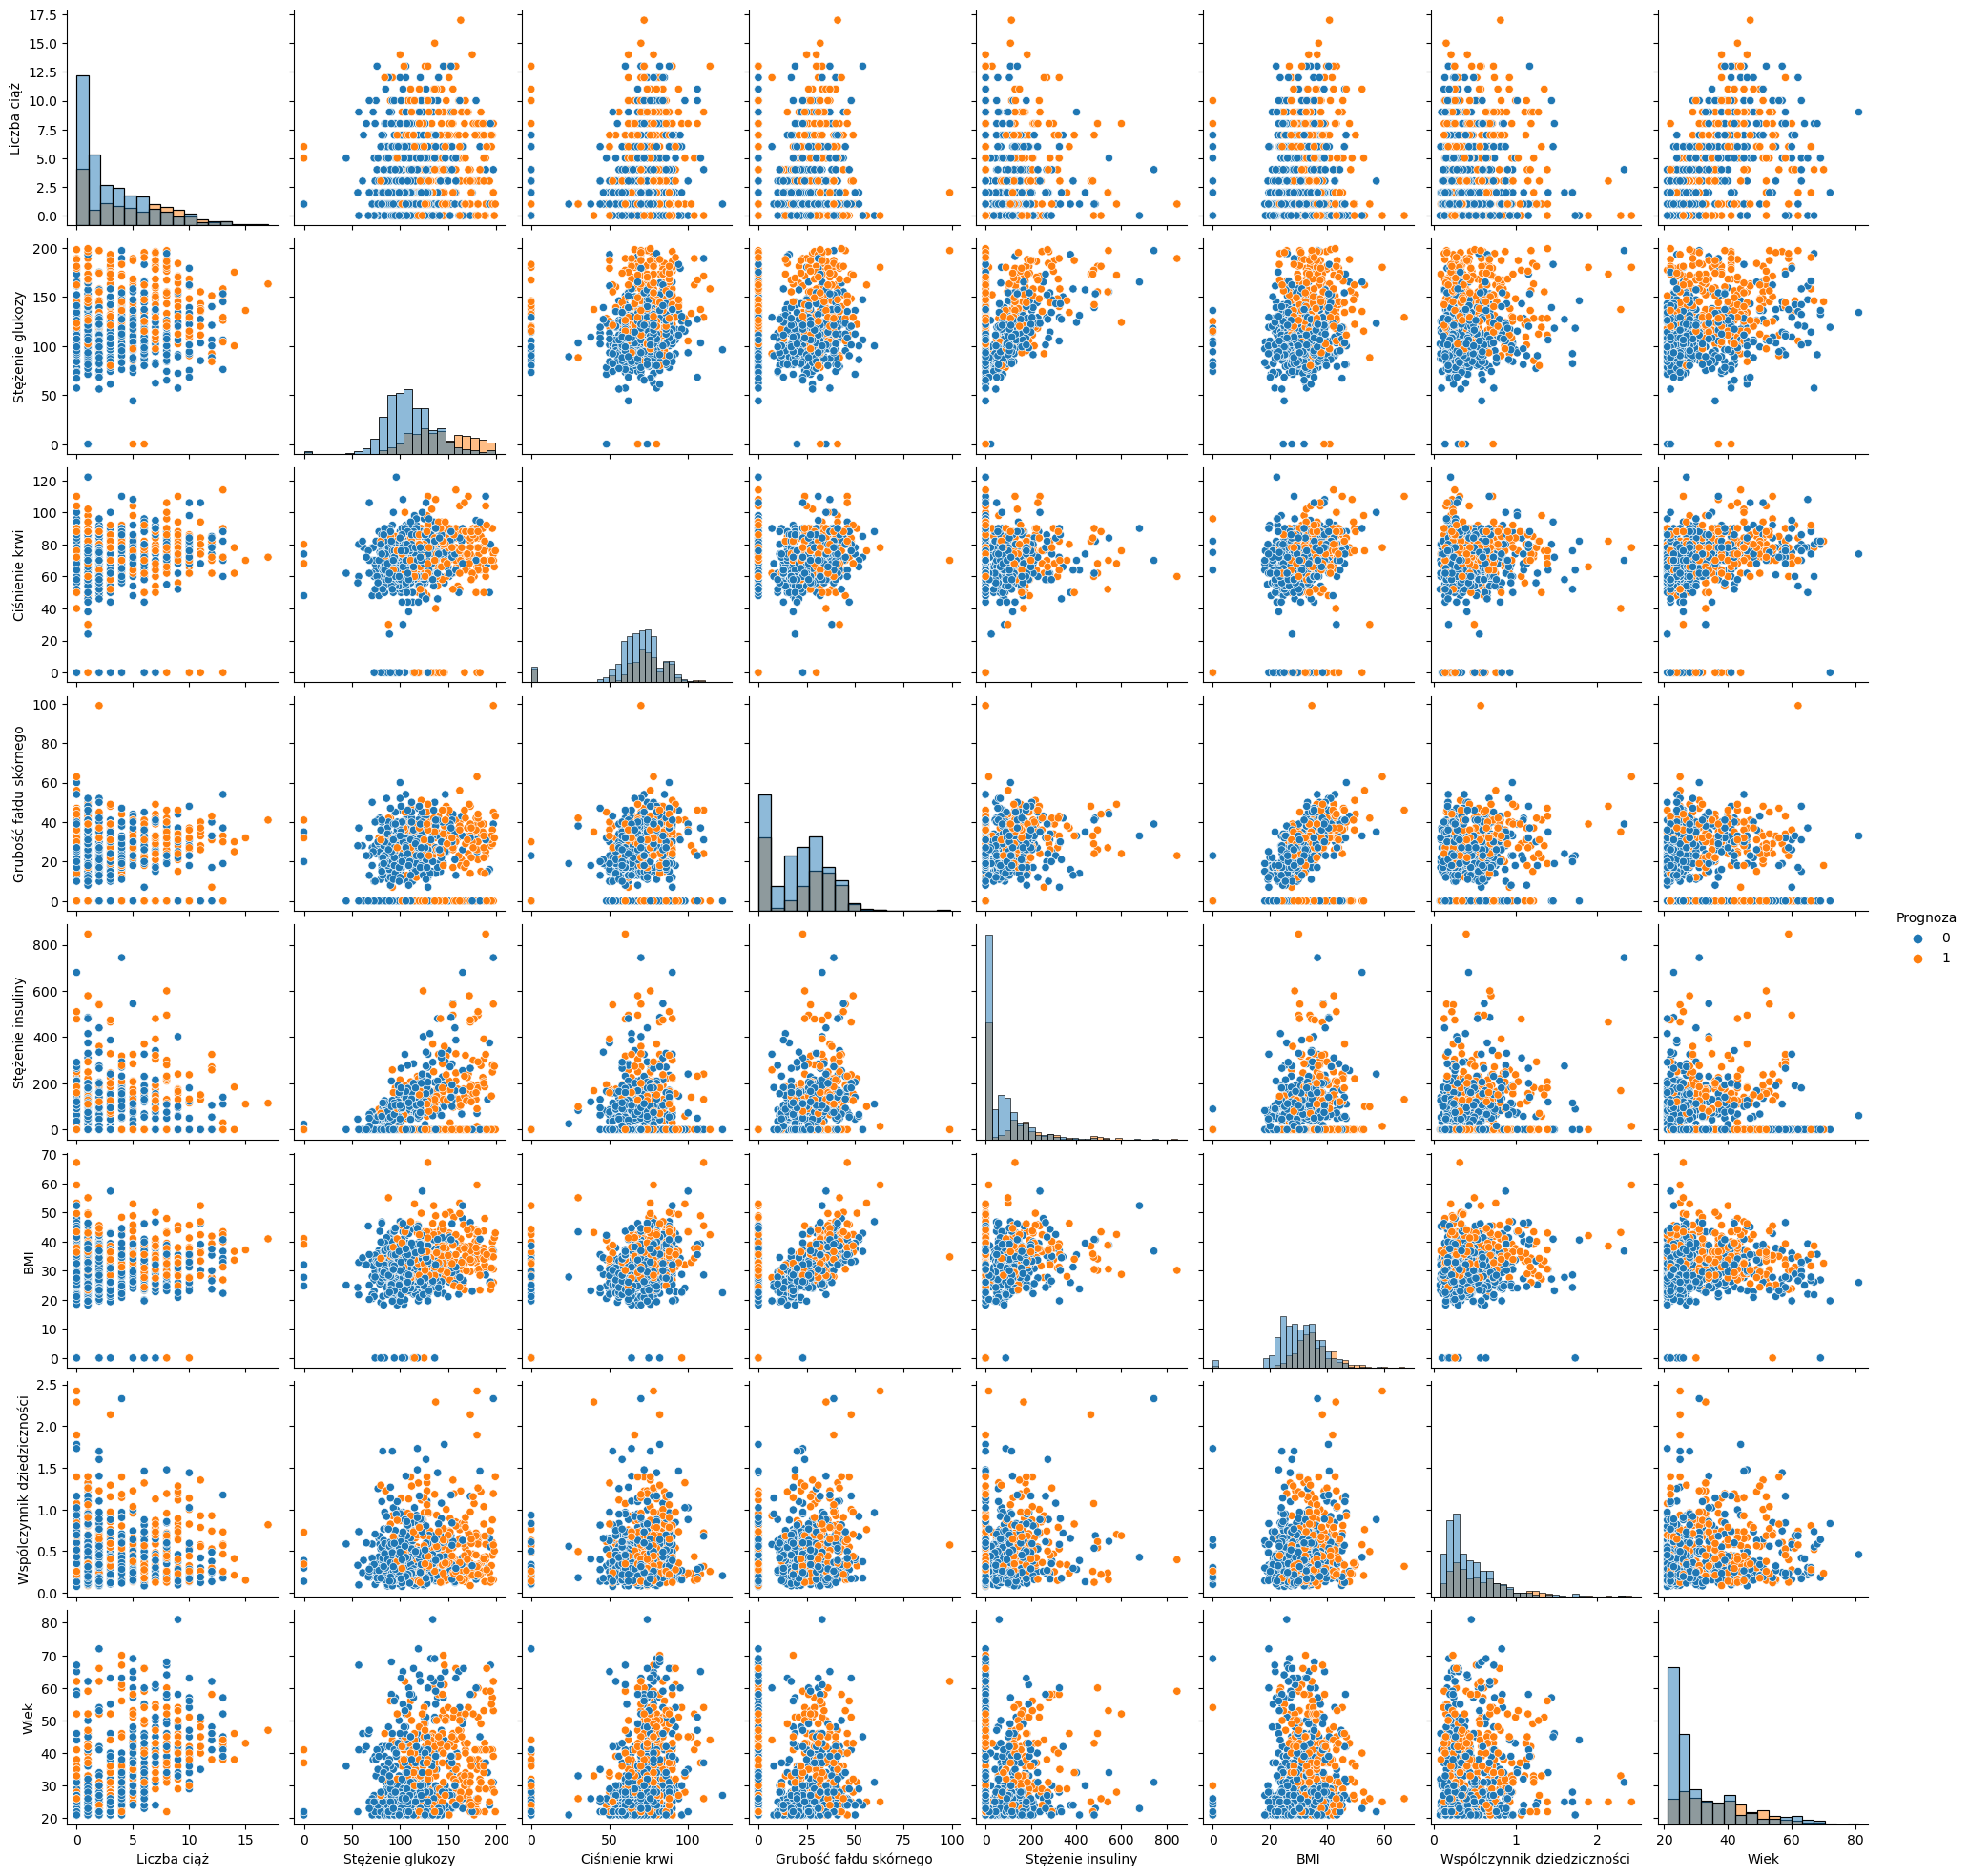

In [14]:
sns.pairplot(data=diabetes, vars=diabetes.columns[:-1], hue='Prognoza', diag_kind='hist')

W zbiorze danych widoczna jest korelacja pomiędzy stężeniem glukozy a stężeniem insuliny. 

#### <a name='3'></a> 3. Wizualizacja danych 

array([[<AxesSubplot:title={'center':'Liczba ciąż'}>,
        <AxesSubplot:title={'center':'Stężenie glukozy'}>,
        <AxesSubplot:title={'center':'Ciśnienie krwi'}>],
       [<AxesSubplot:title={'center':'Grubość fałdu skórnego'}>,
        <AxesSubplot:title={'center':'Stężenie insuliny'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Wspólczynnik dziedziczności'}>,
        <AxesSubplot:title={'center':'Wiek'}>,
        <AxesSubplot:title={'center':'Prognoza'}>]], dtype=object)

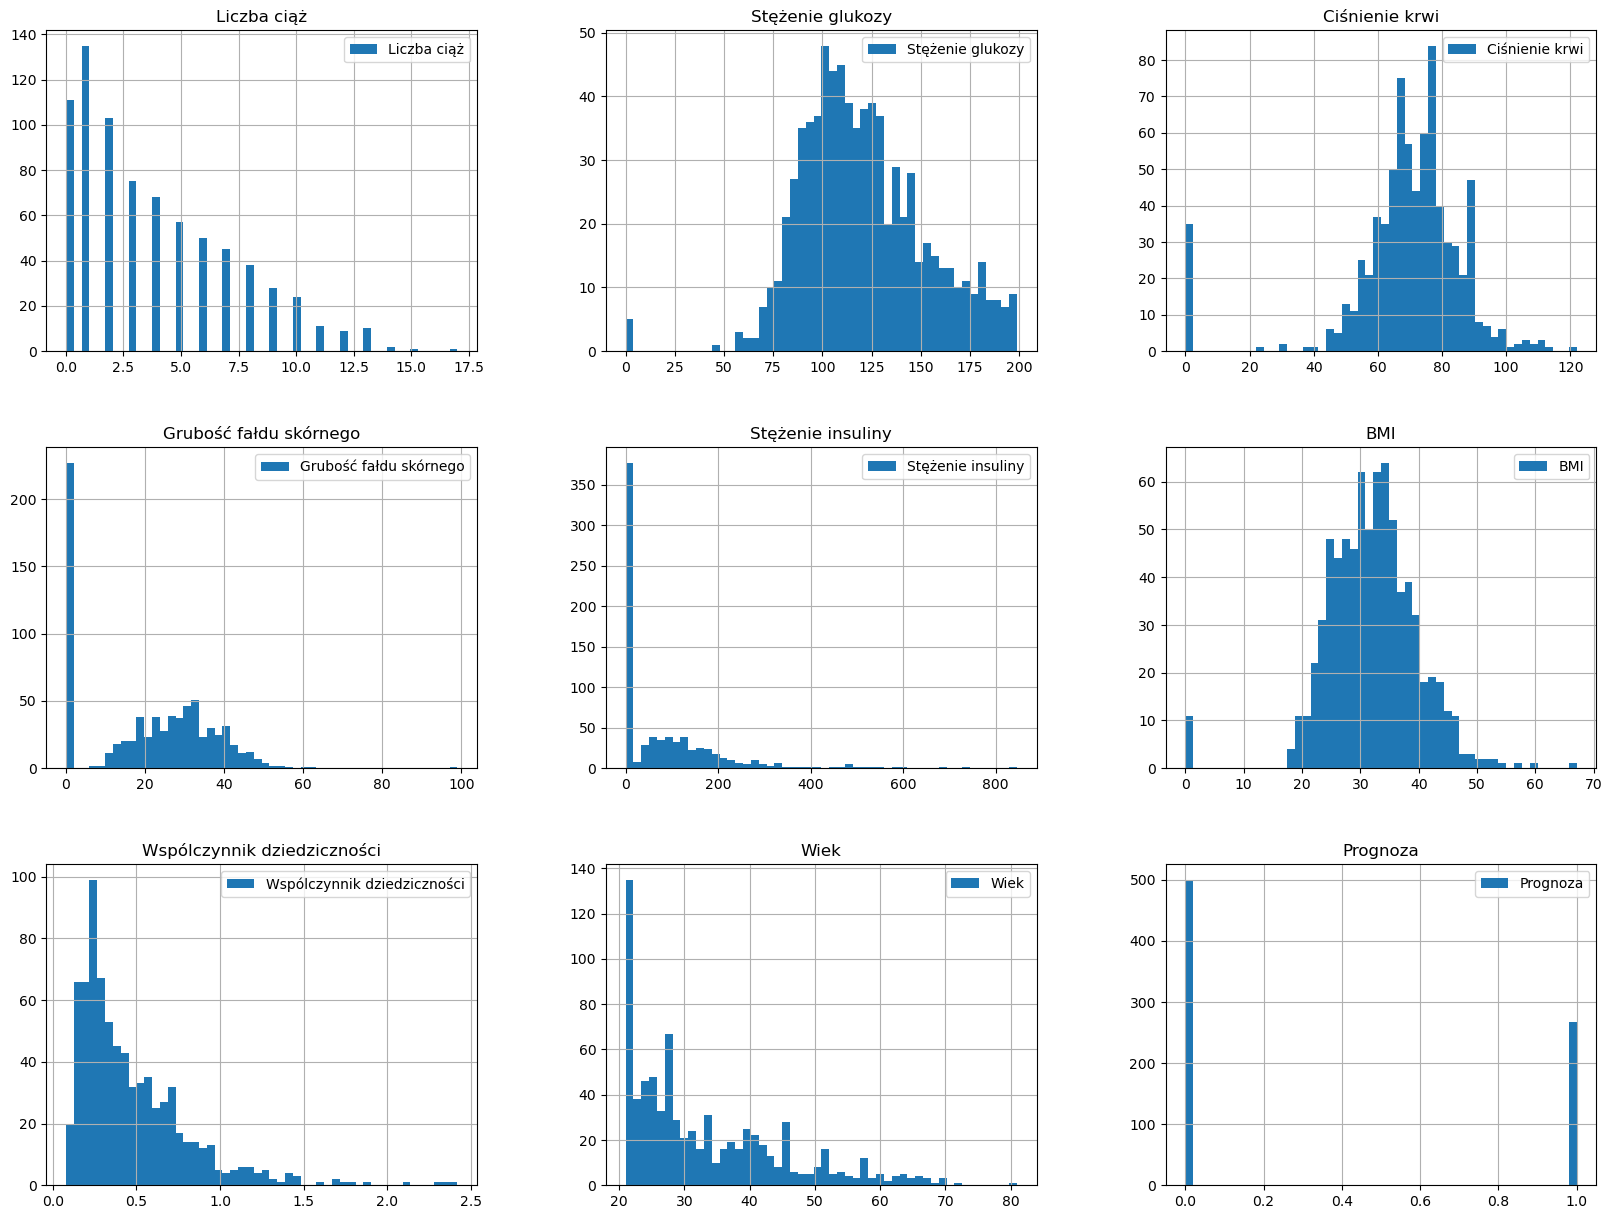

In [15]:
diabetes.hist(bins=50, figsize=(20,15), legend=True)

Na diagramach wyraźnie widać występowanie wartości zerowych i ich wpływ na rozkład statystyczny danych.

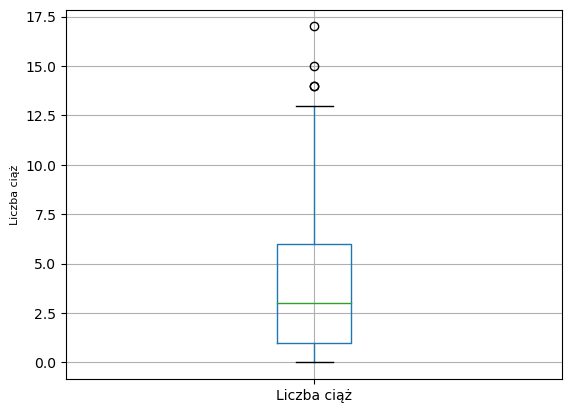

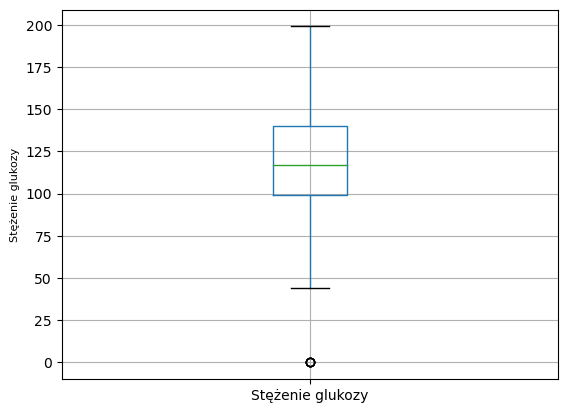

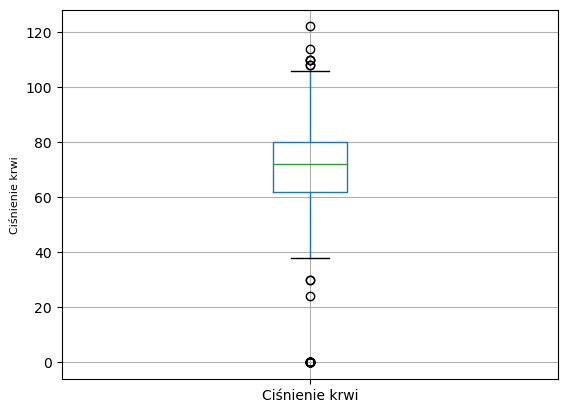

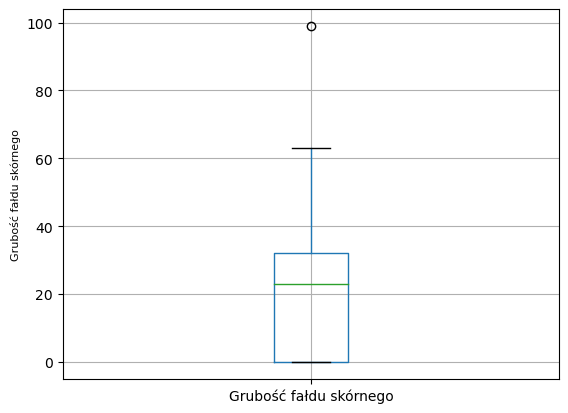

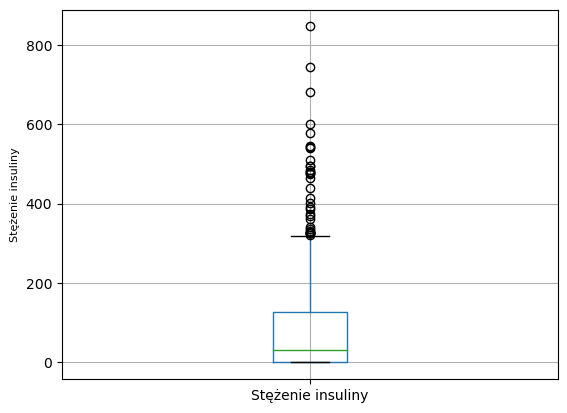

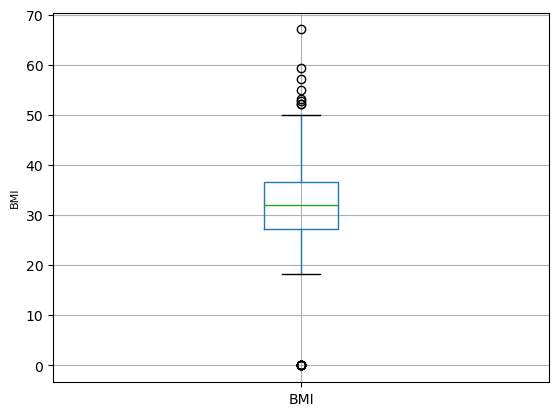

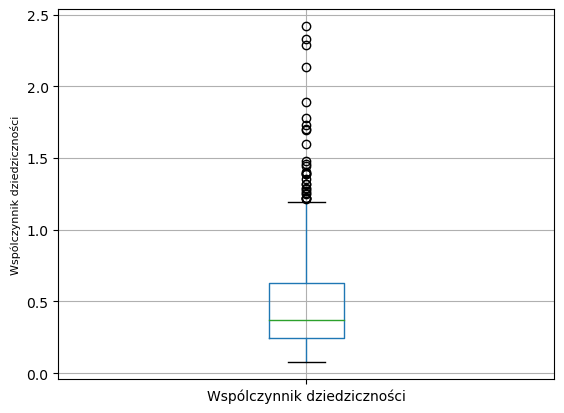

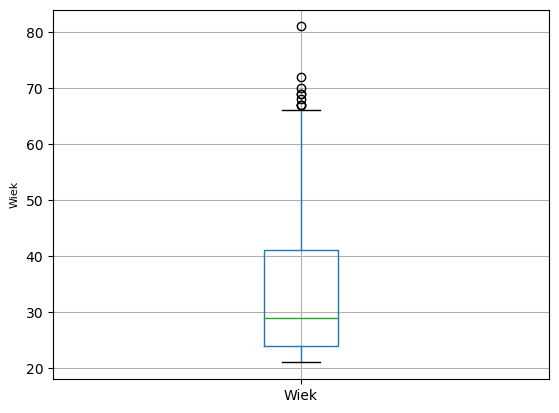

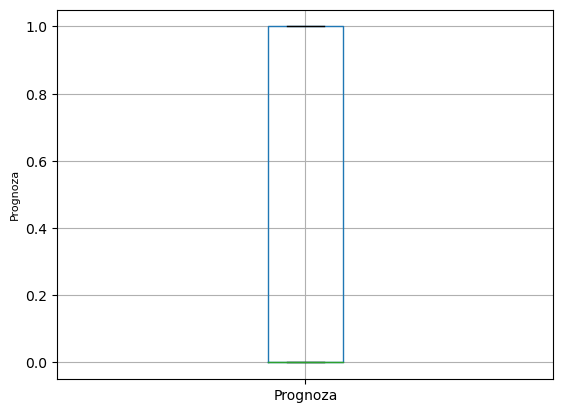

In [16]:
for column in diabetes.columns:
    ax = diabetes[[column]].boxplot()
    ax.set_ylabel(column, fontsize=8)
    plt.show()

#### <a name='4'></a> 4. Przygotowanie danych 

#### <a name='41'></a> 4.1 Zmiana wartości zerowych. 

W przypadku stężenia glukozy, BMI, ciśnienia krwi ze wzgledu na niewielka ilosć wartości zerowych zmiana na medianę, w przypadku stężenia insuliny  i grubości faldu skórnego na wartości prognozowane modelem XGBRegressor.

In [17]:
diabetes[['Stężenie glukozy', 'BMI', 'Ciśnienie krwi']] = diabetes[['Stężenie glukozy', 'BMI', 'Ciśnienie krwi']].replace(0, np.nan)

In [18]:
imputer = SimpleImputer(strategy='median')
diabetes[['Stężenie glukozy', 'Ciśnienie krwi','BMI']]=pd.DataFrame(imputer.fit_transform(diabetes[['Stężenie glukozy', 'Ciśnienie krwi','BMI']]))

In [19]:
X = diabetes.drop('Stężenie insuliny', axis=1)
y = diabetes['Stężenie insuliny']

y_train = y[y != 0]  
y_test = y[y == 0] 

X_train = X[y != 0]  
X_test = X[y == 0] 

In [20]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

diabetes.loc[y == 0, 'Stężenie insuliny'] = y_pred.astype(int)

In [21]:
diabetes

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6             148.0            72.0                      35   
1              1              85.0            66.0                      29   
2              8             183.0            64.0                       0   
3              1              89.0            66.0                      23   
4              0             137.0            40.0                      35   
..           ...               ...             ...                     ...   
763           10             101.0            76.0                      48   
764            2             122.0            70.0                      27   
765            5             121.0            72.0                      23   
766            1             126.0            60.0                       0   
767            1              93.0            70.0                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                  137  33.6                        0.627    50         1  
1                   66  26.6                        0.351    31         0  
2                  233  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                173  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                166  30.1                        0.349    47         1  
767                 71  30.4                        0.315    23         0  

[768 rows x 9 columns]

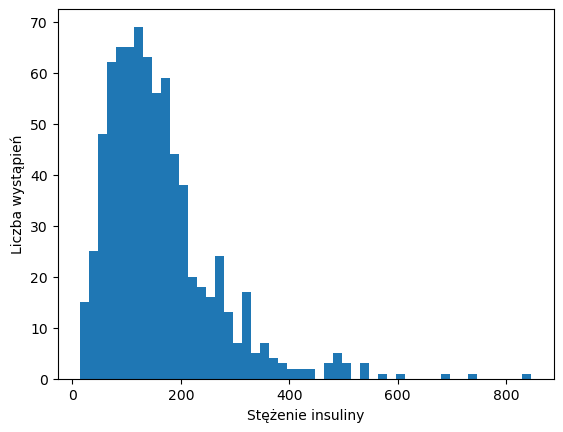

In [22]:
import matplotlib.pyplot as plt
plt.hist(diabetes['Stężenie insuliny'], bins=50)
plt.xlabel('Stężenie insuliny')
plt.ylabel('Liczba wystąpień')
plt.show()

In [23]:
X = diabetes.drop('Grubość fałdu skórnego', axis=1)
y = diabetes['Grubość fałdu skórnego']

y_train = y[y != 0]  
y_test = y[y == 0] 

X_train = X[y != 0]  
X_test = X[y == 0]

In [24]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

diabetes.loc[y == 0, 'Grubość fałdu skórnego'] = y_pred.astype(int)

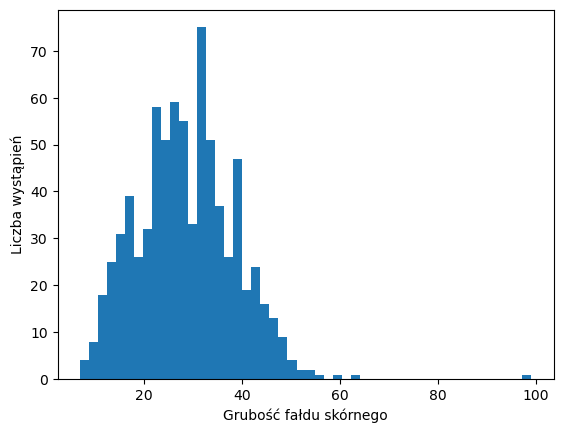

In [25]:
plt.hist(diabetes['Grubość fałdu skórnego'], bins=50)
plt.xlabel('Grubość fałdu skórnego')
plt.ylabel('Liczba wystąpień')
plt.show()

array([[<AxesSubplot:title={'center':'Liczba ciąż'}>,
        <AxesSubplot:title={'center':'Stężenie glukozy'}>,
        <AxesSubplot:title={'center':'Ciśnienie krwi'}>],
       [<AxesSubplot:title={'center':'Grubość fałdu skórnego'}>,
        <AxesSubplot:title={'center':'Stężenie insuliny'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Wspólczynnik dziedziczności'}>,
        <AxesSubplot:title={'center':'Wiek'}>,
        <AxesSubplot:title={'center':'Prognoza'}>]], dtype=object)

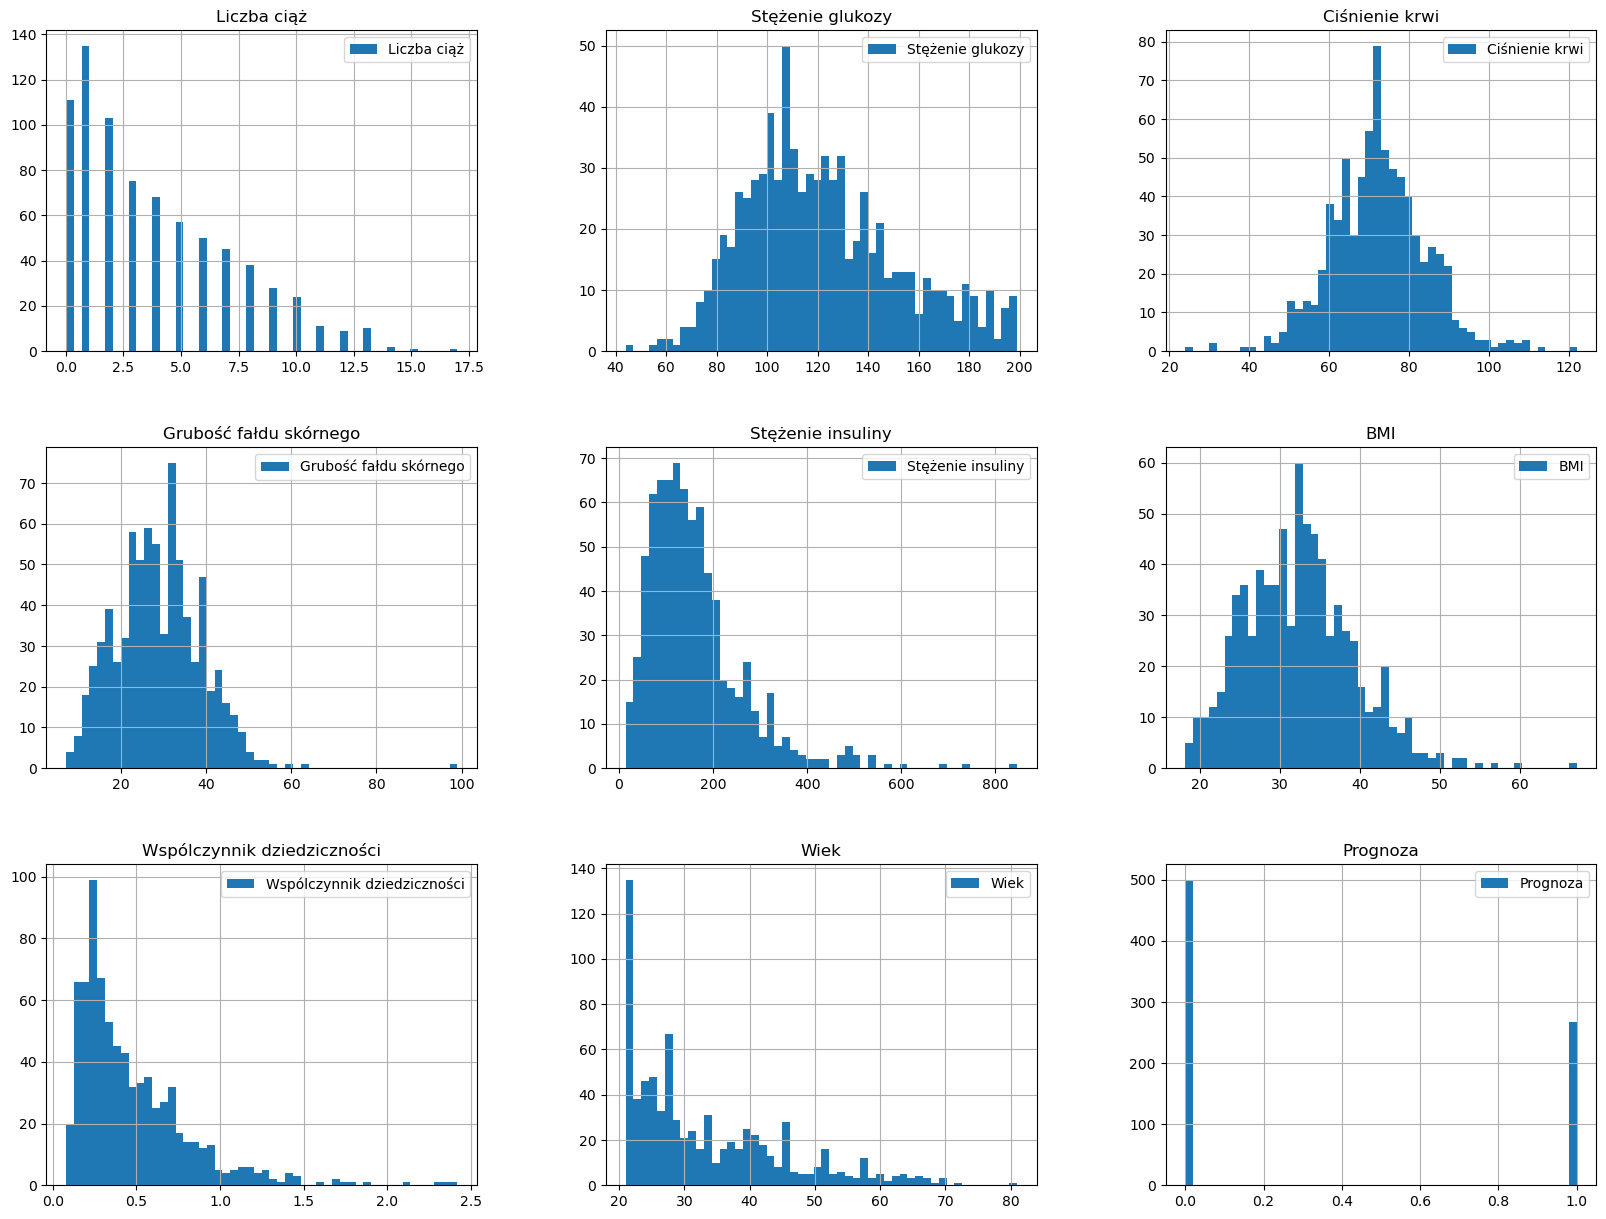

In [26]:
diabetes.hist(bins=50, figsize=(20,15), legend=True)

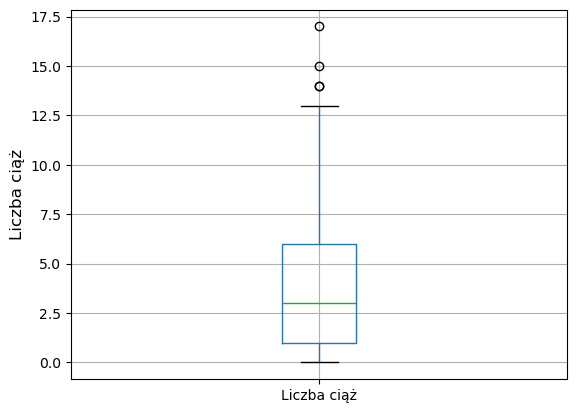

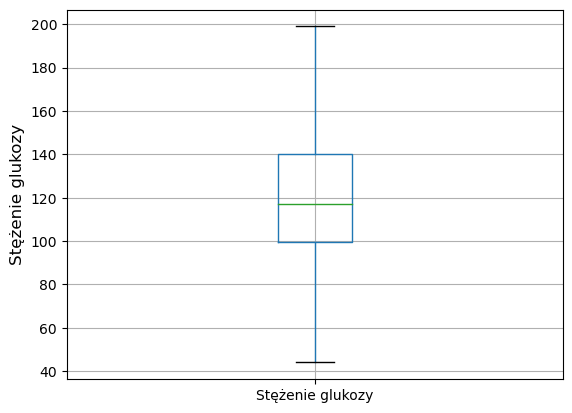

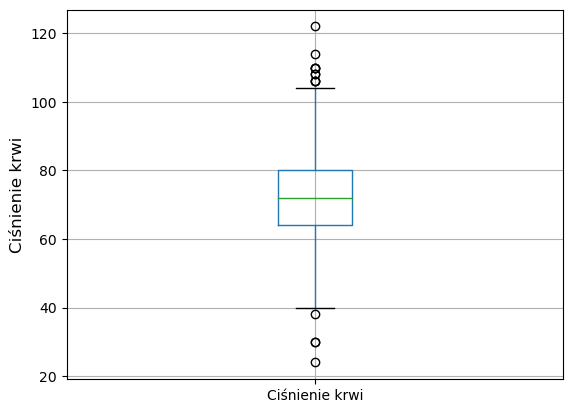

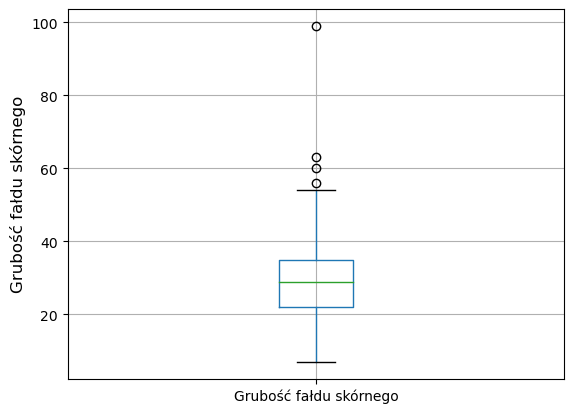

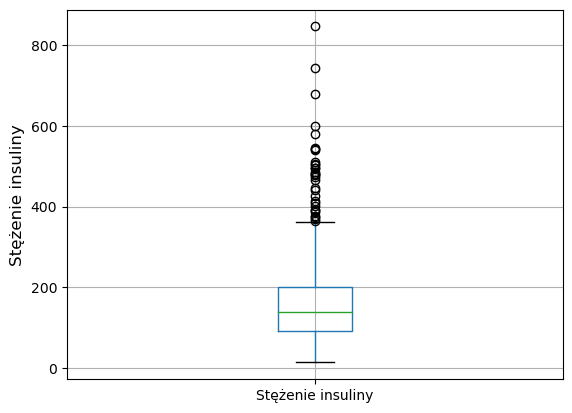

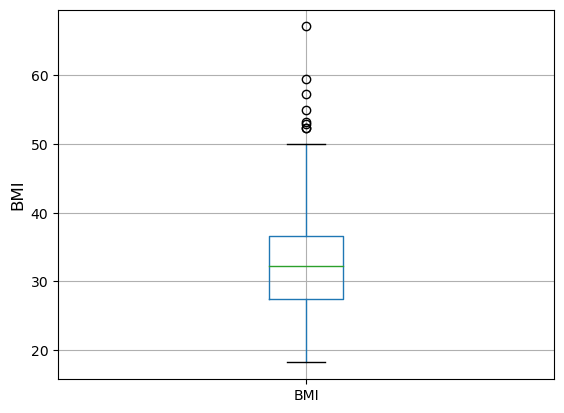

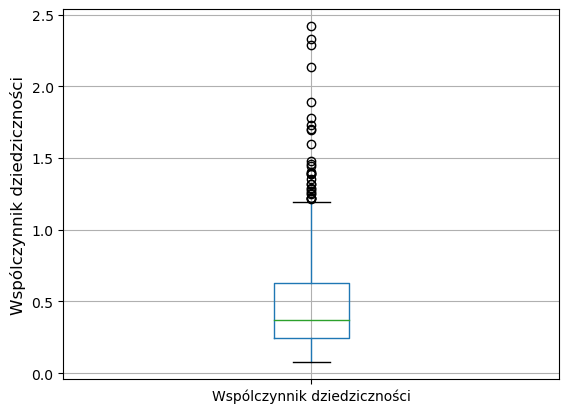

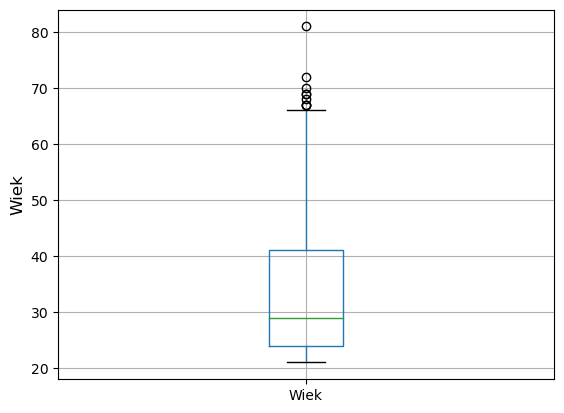

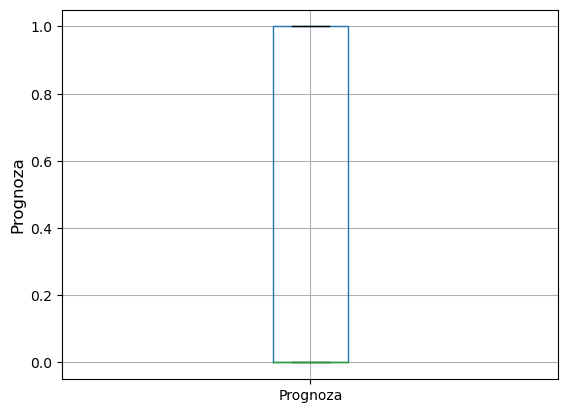

In [27]:
for column in diabetes.columns:
    ax = diabetes[[column]].boxplot()
    ax.set_ylabel(column, fontsize=12)
    plt.show()

Zamiana wartosci zerowych spowodowała poprawę rozkładu statystycznego danych.

<AxesSubplot:>

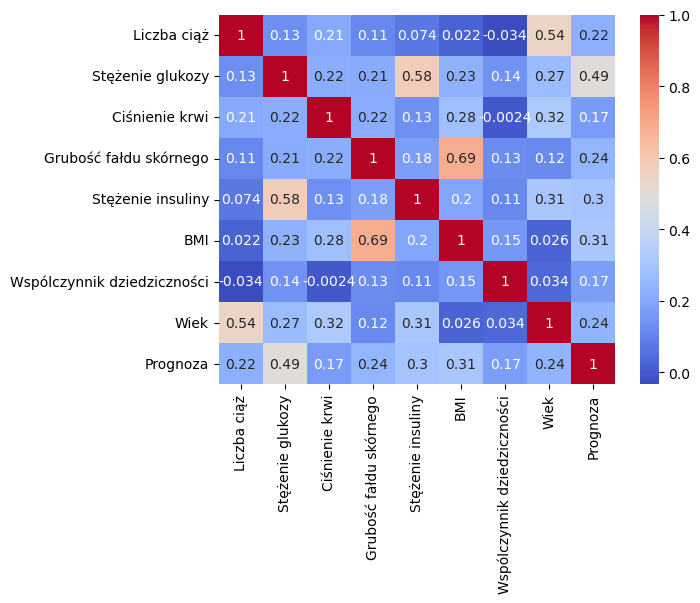

In [28]:
corr_matrix_diabetes = diabetes.corr()
sns.heatmap(corr_matrix_diabetes, annot=True, cmap='coolwarm')

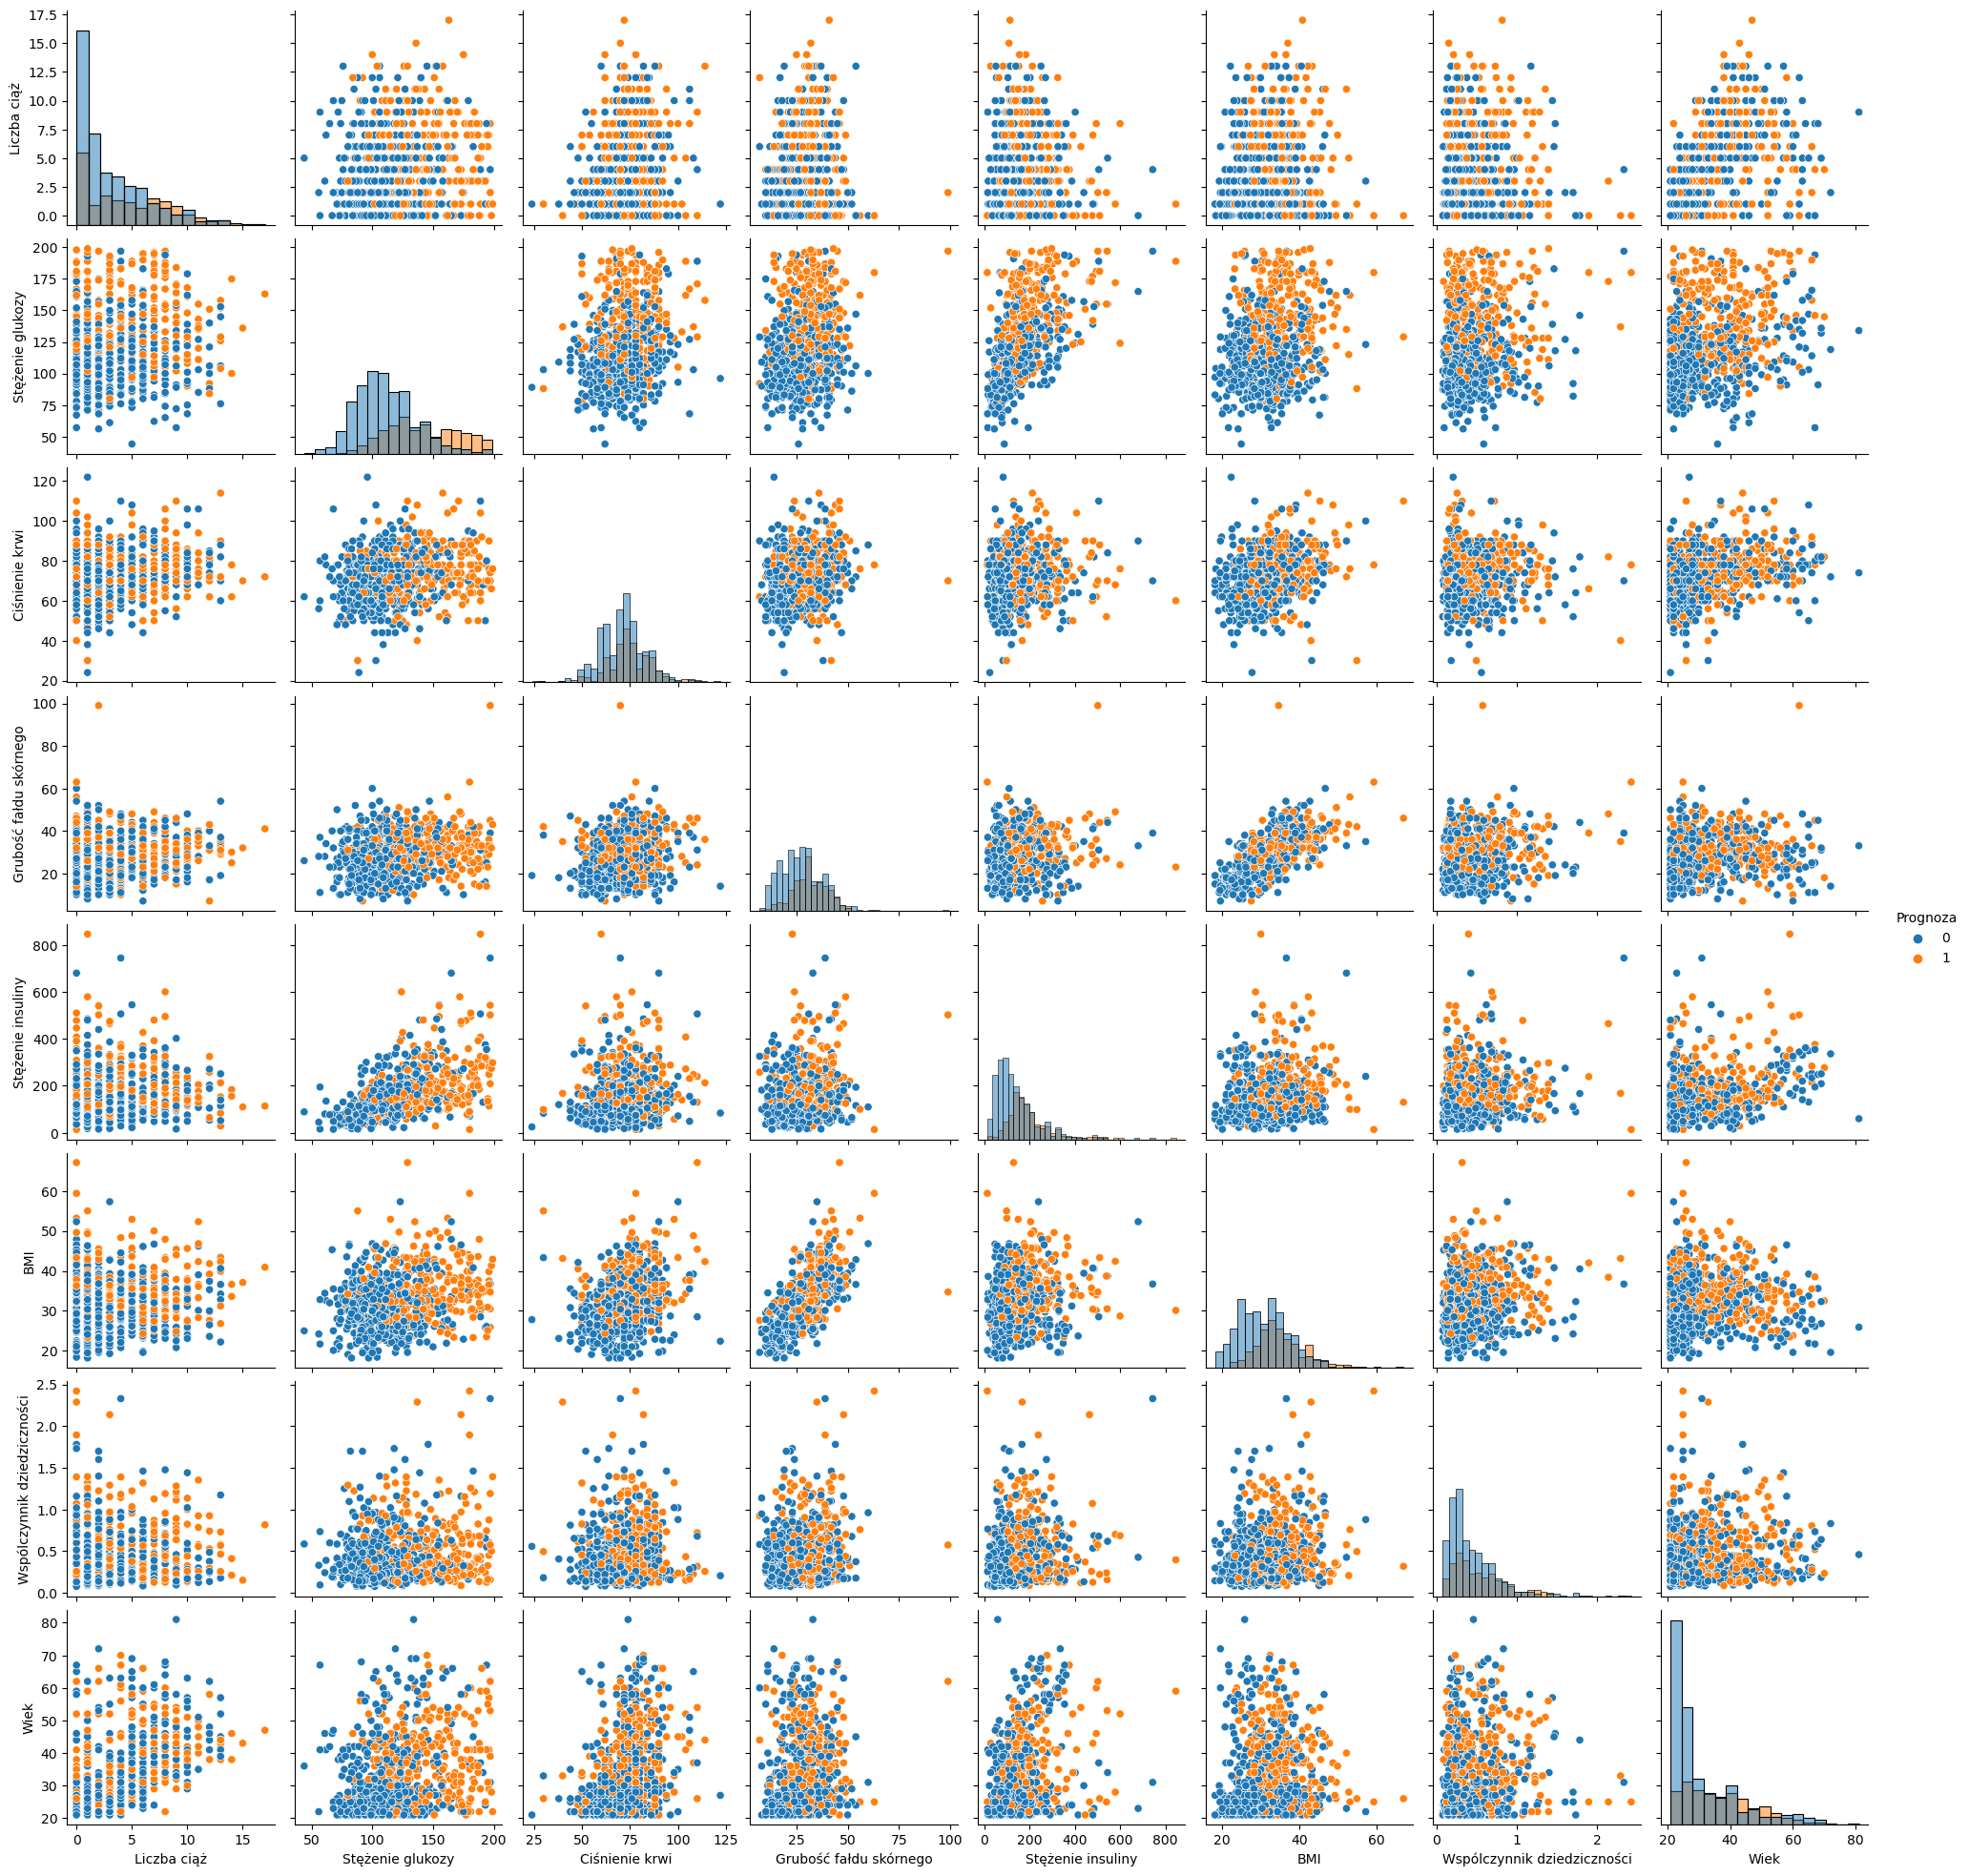

In [29]:
sns.pairplot(data=diabetes, vars=diabetes.columns[:-1], hue='Prognoza', diag_kind='hist')

In [30]:
zeros_count = (diabetes == 0).sum()
zeros_count  

Liczba ciąż                    111
Stężenie glukozy                 0
Ciśnienie krwi                   0
Grubość fałdu skórnego           0
Stężenie insuliny                0
BMI                              0
Wspólczynnik dziedziczności      0
Wiek                             0
Prognoza                       500
dtype: int64

In [31]:
corr_matrix_diabetes = diabetes.corr() 
corr_matrix_diabetes['Prognoza'].sort_values(ascending=False)

Prognoza                       1.000000
Stężenie glukozy               0.492782
BMI                            0.312038
Stężenie insuliny              0.297441
Grubość fałdu skórnego         0.241195
Wiek                           0.238356
Liczba ciąż                    0.221898
Wspólczynnik dziedziczności    0.173844
Ciśnienie krwi                 0.165723
Name: Prognoza, dtype: float64

Po zmianie wartości zerowych zauważono wzrost korelacji między stężeniem glukozy a stężeniem insuliny, a także między grubością fałdu skórnego a BMI. Dodatkowo, nastąpiła niewielka poprawa korelacji między prognozowaną wartością a stężeniem glukozy. Znacznie poprawiła się natomiast korelacja między prognozowaną wartością a stężeniem insuliny, co spowodowało, że ten atrybut stał się trzecim najważniejszym czynnikiem po stężeniu glukozy i BMI.

#### <a name='5'></a> 5 Podział danych 

#### <a name='51'></a> 5.1 Podział danych na zbiór treningowy i testowy

In [32]:
diabetes_copy

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

In [33]:
X = diabetes.drop('Prognoza', axis=1)
y = diabetes['Prognoza']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print((y_train == 1).sum())

214


In [35]:
print((y_train == 0).sum())

400


In [36]:
print((y_test == 0).sum())
print((y_test == 1).sum())

100
54


#### <a name='52'></a> 5.2 Standaryzacja i normalizacja danych 

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
X_test

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0       0.960541          1.245157       -0.663676               -0.583399   
1       1.866489         -1.790266        2.760669               -0.583399   
2      -0.549372          0.010974        0.314708               -0.184838   
3       0.960541         -0.255876       -0.663676               -0.184838   
4      -0.549372         -1.590128       -0.011420               -0.483759   
..           ...               ...             ...                     ...   
149    -0.247390         -1.123140       -1.152868               -1.779083   
150    -0.549372         -0.923002        0.314708               -1.081600   
151    -0.549372         -1.323278       -1.642060               -0.683039   
152     0.054593          2.079064        0.477772                1.010846   
153    -0.851355         -1.690197        0.477772                2.106889   

     Stężenie insuliny       BMI  Wspólczynnik dziedziczności      Wiek  
0             1.236275 -0.740145                    -0.555791  0.561034  
1            -1.124633  0.447785                    -0.583061  1.153060  
2             0.425355  0.506448                     0.016882 -0.623019  
3             0.466414 -0.740145                     0.771356  0.053583  
4            -1.083574 -0.021521                    -1.137554 -0.961320  
..                 ...       ...                          ...       ...  
149          -1.073309 -1.121456                    -0.637601 -0.961320  
150          -0.950131 -0.124182                     0.519865 -0.876744  
151          -0.447155 -0.578822                     3.701382 -0.707594  
152           1.215746  0.667772                    -0.646691 -0.200143  
153          -1.165692  0.110471                    -0.167949 -1.045895  

[154 rows x 8 columns]

In [39]:
X_train

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0      -0.851355         -1.056427       -0.826740               -1.679442   
1       0.356576          0.144399        0.477772               -0.184838   
2      -0.549372         -0.556083       -1.152868                1.110486   
3      -0.851355          0.811525       -1.315932               -0.483759   
4      -1.153338         -0.889646       -0.663676                1.010846   
..           ...               ...             ...                     ...   
609    -0.549372          0.411249       -0.174484               -0.782679   
610     0.054593         -1.523416       -0.826740                0.213724   
611    -0.851355         -0.822933       -0.174484                1.110486   
612     1.866489         -0.355945       -0.174484               -0.184838   
613     0.054593          0.744812       -1.152868               -0.085197   

     Stężenie insuliny       BMI  Wspólczynnik dziedziczności      Wiek  
0            -1.186222 -0.769477                     0.310794 -0.792169  
1            -1.401783 -0.417498                    -0.116439  0.561034  
2            -0.662716  0.359790                    -0.764862 -0.707594  
3             1.133627 -0.402832                     0.262314 -0.369293  
4            -0.549803  1.782373                    -0.337630 -0.961320  
..                 ...       ...                          ...       ...  
609          -0.293183 -0.520158                     0.195653 -0.876744  
610          -0.282918  0.227798                    -0.261879 -0.707594  
611          -0.539538  0.829096                    -0.786072 -0.284718  
612          -0.139210 -0.725480                    -1.019383  0.561034  
613          -0.190534 -0.432163                    -0.577001  0.307308  

[614 rows x 8 columns]

#### <a name='6'></a> 6 Modelowanie predykcyjne (pełny zbiór atrybutów) 

Do analiza predykcji wystąpienia cukrzycy wykorzystano modele RandomForestClassifier, LogisticRegression, SVC, XGBClassifier. Random Forest został wybrany ze względu na jego zdolność do pracy z dużą liczbą cech i radzenia sobie z potencjalnymi interakcjami między nimi. Dzięki swojemu podejściu opartemu na zbiorach drzew decyzyjnych, Random Forest jest wyjątkowo odporny na przeuczenie i zapewnia wysoką dokładność predykcji.

Support Vector Classifier (SVC), z kolei, jest modelem, który doskonale sprawdza się w przypadkach, gdzie dane mogą być trudne do oddzielenia liniowo. SVC, dzięki swojej zdolności do maksymalizowania marginesu między klasami, jest idealnym wyborem do sytuacji, gdzie istotne jest precyzyjne rozdzielenie klas 0 i 1, czyli wystąpienia lub braku cukrzycy.

Logistic Regression oferuje prostotę i interpretowalność, co jest szczególnie ważne w kontekście medycznym, gdzie zrozumienie wpływu poszczególnych cech na ryzyko wystąpienia choroby jest kluczowe. 
Z kolei XGBoost, jako zaawansowana technika boostingowa, łączy szybkość działania z wysoką skutecznością, co czyni go idealnym narzędziem do uzyskania najlepszych wyników w trudnych przypadkach.

#### <a name='61'></a> 6.1 Trenowanie modeli na ustawieniach domyślnych z i bez walidacji krzyżowej 

In [40]:
models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), 
          SVC(random_state=42), xgb.XGBClassifier(random_state=42)]

cv = StratifiedKFold(n_splits=5)

for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    model_name = type(model).__name__
    
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TRENINGOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_train, y_pred_train), '.4f'))
    print("Precyzja: ", format(precision_score(y_train, y_pred_train), '.4f'))
    print("Czułość: ", format(recall_score(y_train, y_pred_train), '.4f'))
    print("F1-score: ", format(f1_score(y_train, y_pred_train), '.4f'))
    
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TESTOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_test, y_pred), '.4f'))
    print("Precyzja: ", format(precision_score(y_test, y_pred), '.4f'))
    print("Czułość: ", format(recall_score(y_test, y_pred), '.4f'))
    print("F1-score: ", format(f1_score(y_test, y_pred), '.4f'))


    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

    print(f"\nWYNIKI DLA MODELU {model_name.upper()} Z WALIDACJI KRZYŻOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_train, y_pred_cv), '.4f'))
    print("Precyzja: ", format(precision_score(y_train, y_pred_cv), '.4f'))
    print("Czułość: ", format(recall_score(y_train, y_pred_cv), '.4f'))
    print("F1-score: ", format(f1_score(y_train, y_pred_cv), '.4f'))


WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TRENINGOWYCH:

Dokładność:  1.0000
Precyzja:  1.0000
Czułość:  1.0000
F1-score:  1.0000

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TESTOWYCH:

Dokładność:  0.7532
Precyzja:  0.6818
Czułość:  0.5556
F1-score:  0.6122

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER Z WALIDACJI KRZYŻOWEJ:

Dokładność:  0.7638
Precyzja:  0.6906
Czułość:  0.5841
F1-score:  0.6329

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7834
Precyzja:  0.7455
Czułość:  0.5748
F1-score:  0.6491

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TESTOWYCH:

Dokładność:  0.7208
Precyzja:  0.6222
Czułość:  0.5185
F1-score:  0.5657

WYNIKI DLA MODELU LOGISTICREGRESSION Z WALIDACJI KRZYŻOWEJ:

Dokładność:  0.7720
Precyzja:  0.7229
Czułość:  0.5607
F1-score:  0.6316

WYNIKI DLA MODELU SVC DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8388
Precyzja:  0.8402
Czułość:  0.6636
F1-score:  0.7415

WYNIKI DLA MODELU SVC DLA DANYCH TESTOWYCH:

Dokładno

Zastosowano następujace miary oceny jakości modeli:

Dokładność - procent poprawnych przewidywań spośród wszystkich przewidywań. Ze względu na nierówny rozkład klas w badanym zestawie danych mozna wystąpic zafałszowanie wartości tego parametru ponieważ model może osiągnąć wysoką dokładność, przewidując tylko dominującą klasę.

Precyzja - procent prawdziwych pozytywnych przypadków spośród wszystkich przypadków, które model oznaczył jako pozytywne. Precyzja jest istotna w diagnostyce medycznej, gdzie fałszywe alarmy mogą prowadzić do niepotrzebnych i kosztownych badań

Czułość -procent prawdziwych pozytywnych przypadków spośród wszystkich rzeczywistych pozytywnych przypadków. Czułość jest kluczowa w diagnostyce chorób, gdy koszt fałszywych negatywnych przypadków jest wysoki, gdy chcemy zminimalizować ryzyko przeoczenia prawdziwego przypadku choroby.

F1-score - średnia harmoniczna precyzji i czułości. Jest to zrównoważona miara, która uwzględnia zarówno fałszywe pozytywy, jak i fałszywe negatywy. F1-score jest przydatna, w przypadku nierównomiernego rozkładu klas, łączy zarówno precyzję, jak i czułość w jedną wartość, co jest pomocne w celu uzyskania zrównoważonego widoku na wydajność modelu.

#### <a name='62'></a> 6.2 Dobór najlepszych hiperparametrów

In [41]:
models = [
    {
        'name': 'RF',
        'estimator': RandomForestClassifier(random_state=42),
        'hyperparameters': {
            'n_estimators': [50, 100, 150], 
            'max_depth': [5, 10, None], 
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'LR',
        'estimator': LogisticRegression(random_state=42),
        'hyperparameters': {
            'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10], 
            'solver': ['liblinear', 'saga']
        }
    },
    {
        'name': 'SVC',
        'estimator': SVC(random_state=42),
        'hyperparameters': {
            'C': [0.1, 1, 10], 
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma': [0.1, 1, 'scale']
        }
    },
    {
        'name': 'XGBoost',
        'estimator': xgb.XGBClassifier(random_state=42),
        'hyperparameters': {
            'learning_rate': [0.1, 0.3, 0.5],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 150]
        }
    }
]


for model in models:
    print(f"Model: {model['name']}")

    cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=cv)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model_name = f"best_{model['name']}"
    globals()[best_model_name] = best_model
    
    print(f"Najlepsze parametry: {grid_search.best_params_}")
    print(f"Najlepszy wynik: {grid_search.best_score_}")
    print("-------------------------------------------")


Model: RF
Najlepsze parametry: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Najlepszy wynik: 0.7784886045581768
-------------------------------------------
Model: LR
Najlepsze parametry: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Najlepszy wynik: 0.7850459816073571
-------------------------------------------
Model: SVC
Najlepsze parametry: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Najlepszy wynik: 0.7785552445688391
-------------------------------------------
Model: XGBoost
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Najlepszy wynik: 0.7590030654404905
-------------------------------------------


#### <a name='63'></a> 6.3 Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli. 


In [42]:
models = [best_RF, best_LR, best_SVC, best_XGBoost]


for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    model_name = type(model).__name__

    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TRENINGOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_train, y_pred_train), '.4f'))
    print("Precyzja: ", format(precision_score(y_train, y_pred_train), '.4f'))
    print("Czułość: ", format(recall_score(y_train, y_pred_train), '.4f'))
    print("F1-score: ", format(f1_score(y_train, y_pred_train), '.4f'))
    
    
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TESTOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_test, y_pred), '.4f'))
    print("Precyzja: ", format(precision_score(y_test, y_pred), '.4f'))
    print("Czułość: ", format(recall_score(y_test, y_pred), '.4f'))
    print("F1-score: ", format(f1_score(y_test, y_pred), '.4f'))


    


WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TRENINGOWYCH:

Dokładność:  0.9853
Precyzja:  0.9952
Czułość:  0.9626
F1-score:  0.9786

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TESTOWYCH:

Dokładność:  0.7468
Precyzja:  0.6596
Czułość:  0.5741
F1-score:  0.6139

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7866
Precyzja:  0.7485
Czułość:  0.5841
F1-score:  0.6562

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TESTOWYCH:

Dokładność:  0.7078
Precyzja:  0.5957
Czułość:  0.5185
F1-score:  0.5545

WYNIKI DLA MODELU SVC DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7818
Precyzja:  0.7564
Czułość:  0.5514
F1-score:  0.6378

WYNIKI DLA MODELU SVC DLA DANYCH TESTOWYCH:

Dokładność:  0.7143
Precyzja:  0.6190
Czułość:  0.4815
F1-score:  0.5417

WYNIKI DLA MODELU XGBCLASSIFIER DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8583
Precyzja:  0.8290
Czułość:  0.7477
F1-score:  0.7862

WYNIKI DLA MODELU XGBCLASSIFIER DLA DANYCH TESTOWYCH:

Dokładność:  0.7597
P

#### <a name='7'></a> 7 Modelowanie predykcyjne na zbiorze danych po usunięciu atrybutów o niskiej korelacji

In [43]:
diabetes_redu = diabetes_red.drop(['Wspólczynnik dziedziczności', 'Ciśnienie krwi','Liczba ciąż', 'Wiek', 'Grubość fałdu skórnego'], axis=1)

Pozostawiono trzy atrybuty o najwyższej wartości korelacji, pozostałe zostału usunięte.

In [44]:
diabetes_redu

Stężenie glukozy  Stężenie insuliny   BMI  Prognoza
0                 148                  0  33.6         1
1                  85                  0  26.6         0
2                 183                  0  23.3         1
3                  89                 94  28.1         0
4                 137                168  43.1         1
..                ...                ...   ...       ...
763               101                180  32.9         0
764               122                  0  36.8         0
765               121                112  26.2         0
766               126                  0  30.1         1
767                93                  0  30.4         0

[768 rows x 4 columns]

<AxesSubplot:>

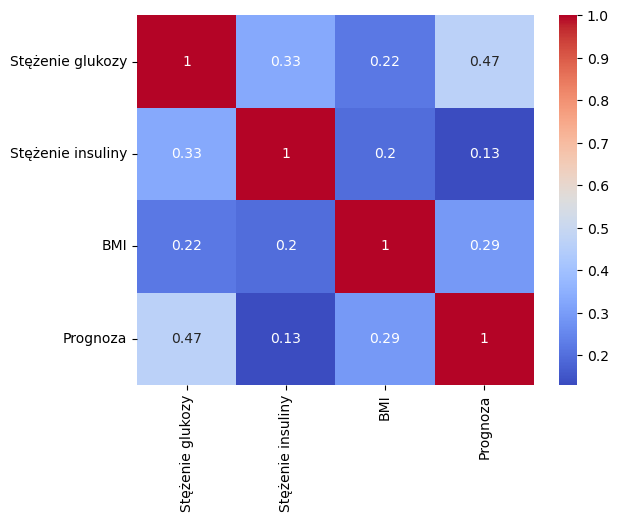

In [45]:
corr_matrix_diabetes_redu = diabetes_redu.corr()
sns.heatmap(corr_matrix_diabetes_redu, annot=True, cmap='coolwarm')

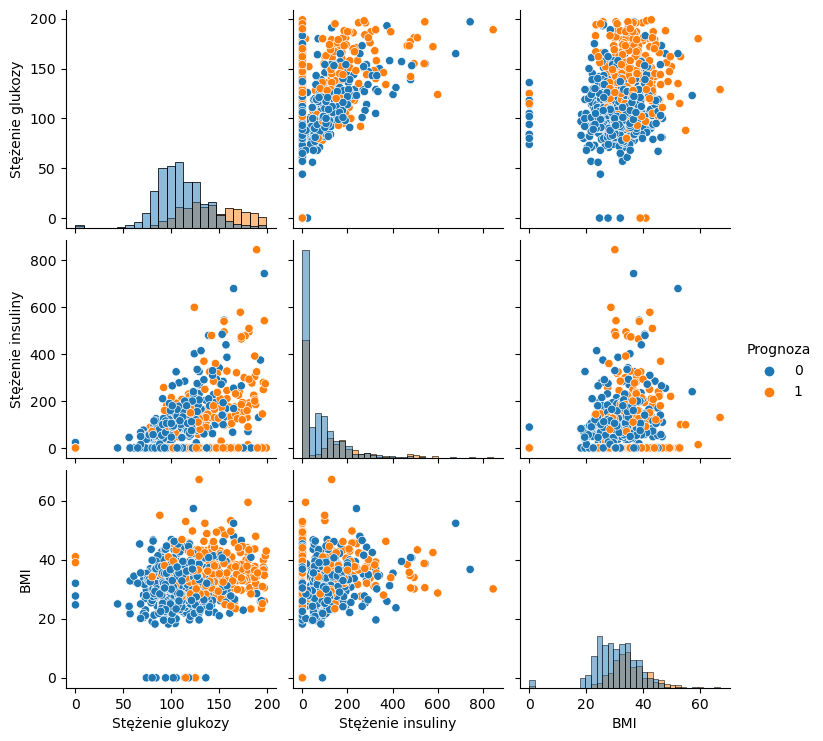

In [46]:
sns.pairplot(data= diabetes_redu, vars=diabetes_redu.columns[:-1], hue='Prognoza', diag_kind='hist')

In [47]:
X1 = diabetes_redu.drop('Prognoza', axis=1)
y1 = diabetes_redu['Prognoza']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

In [48]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_train1 = pd.DataFrame(X_train_scaled1, columns=X_train1.columns)

X_test_scaled1 = scaler.transform(X_test1)
X_test1 = pd.DataFrame(X_test_scaled1, columns=X_test1.columns)


In [49]:
X_train1

Stężenie glukozy  Stężenie insuliny       BMI
0           -0.980131          -0.331319 -0.607678
1            0.161444          -0.526398 -0.302139
2           -0.504474           0.142444  0.372594
3            0.795653          -0.730766 -0.289408
4           -0.821579           0.244628  1.607482
..                ...                ...       ...
609          0.415128          -0.730766 -0.391255
610         -1.424076          -0.730766  0.258017
611         -0.758158          -0.730766  0.779980
612         -0.314212          -0.730766 -0.569486
613          0.732232           0.569759 -0.314870

[614 rows x 3 columns]

In [50]:
X_test1

Stężenie glukozy  Stężenie insuliny       BMI
0            1.207888          -0.730766 -0.582217
1           -1.677760          -0.275582  0.448979
2            0.034603           1.127127  0.499902
3           -0.219081          -0.730766 -0.582217
4           -1.487497          -0.730766 -4.070459
..                ...                ...       ...
149         -1.043552          -0.229135 -0.913218
150         -0.853289          -0.117662 -0.047523
151         -1.233814           0.337522 -0.442178
152          2.000648           1.842416  0.639941
153         -1.582629          -0.312740  0.156170

[154 rows x 3 columns]

#### <a name='71'></a> 7.1 Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową

In [51]:
models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), 
          SVC(random_state=42), xgb.XGBClassifier(random_state=42)]

for model in models:
    cv = StratifiedKFold(n_splits=5)
    model.fit(X_train1, y_train1)
    y_pred_train1 = model.predict(X_train1)
    y_pred_train1cv = cross_val_predict(model, X_train1, y_train1, cv=cv)
    y_pred1 = model.predict(X_test1)

    model_name = type(model).__name__
    
  

    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_train1, y_pred_train1), '.4f'))
    print("Precyzja: ", format(precision_score(y_train1, y_pred_train1), '.4f'))
    print("Czułość: ", format(recall_score(y_train1, y_pred_train1), '.4f'))
    print("F1-score: ", format(f1_score(y_train1, y_pred_train1), '.4f'))
    
 
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_test1, y_pred1), '.4f'))
    print("Precyzja: ", format(precision_score(y_test1, y_pred1), '.4f'))
    print("Czułość: ", format(recall_score(y_test1, y_pred1), '.4f'))
    print("F1-score: ", format(f1_score(y_test1, y_pred1), '.4f'))

    
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:\n")
    print("Dokładność: ", format(accuracy_score(y_train1, y_pred_train1cv), '.4f'))
    print("Precyzja: ", format(precision_score(y_train1, y_pred_train1cv), '.4f'))
    print("Czułość: ", format(recall_score(y_train1, y_pred_train1cv), '.4f'))
    print("F1-score: ", format(f1_score(y_train1, y_pred_train1cv), '.4f'))


WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.9984
Precyzja:  1.0000
Czułość:  0.9953
F1-score:  0.9977

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.6883
Precyzja:  0.5652
Czułość:  0.4815
F1-score:  0.5200

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.7264
Precyzja:  0.6278
Czułość:  0.5280
F1-score:  0.5736

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7720
Precyzja:  0.7256
Czułość:  0.5561
F1-score:  0.6296

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7078
Precyzja:  0.6047
Czułość:  0.4815
F1-score:  0.5361

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.7704
Precyzja:  0.7296
Czułość:  0.5421
F1-score:  0.6220

WYNIKI DLA MODELU SVC DLA DANYC

#### <a name='72'></a> 7.2 Dobór najlepszych hiperparametrów

In [52]:
models = [
    {
        'name': 'RF',
        'estimator': RandomForestClassifier(random_state=42),
        'hyperparameters': {
            'n_estimators': [50, 100, 150], 
            'max_depth': [5, 10, None], 
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'LR',
        'estimator': LogisticRegression(random_state=42),
        'hyperparameters': {
            'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10], 
            'solver': ['liblinear', 'saga']
        }
    },
    {
        'name': 'SVC',
        'estimator': SVC(random_state=42),
        'hyperparameters': {
            'C': [0.1, 1, 10], 
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma': [0.1, 1, 'scale']
        }
    },
    {
        'name': 'XGBoost',
        'estimator': xgb.XGBClassifier(random_state=42),
        'hyperparameters': {
            'learning_rate': [0.1, 0.3, 0.5],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 150]
        }
    }
]


for model in models:
    print(f"Model: {model['name']}")

    cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=cv)
    
    grid_search.fit(X_train1, y_train1)
    
    best1_model = grid_search.best_estimator_
    best1_model_name = f"best1_{model['name']}"
    globals()[best1_model_name] = best1_model
    
    print(f"Najlepsze parametry: {grid_search.best_params_}")
    print(f"Najlepszy wynik: {grid_search.best_score_}")
    print("____________________________________________________")


Model: RF
Najlepsze parametry: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Najlepszy wynik: 0.7687991470078634
____________________________________________________
Model: LR
Najlepsze parametry: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Najlepszy wynik: 0.7753431960549115
____________________________________________________
Model: SVC
Najlepsze parametry: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Najlepszy wynik: 0.7769558843129414
____________________________________________________
Model: XGBoost
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Najlepszy wynik: 0.7460482473677196
____________________________________________________


#### <a name='73'></a> 7.3 Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli

In [53]:
models = [best1_RF, best1_LR, best1_SVC, best1_XGBoost]

for model in models:
    model.fit(X_train1, y_train1)
    y_pred_train1 = model.predict(X_train1)
    y_pred1 = model.predict(X_test1)
    model_name = type(model).__name__

    print(f"WYNIKI DLA MODELU {model_name.upper()}\n\nDLA DANYCH TRENINGOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_train1, y_pred_train1), '.4f'))
    print("Precyzja: ", format(precision_score(y_train1, y_pred_train1), '.4f'))
    print("Czułość: ", format(recall_score(y_train1, y_pred_train1), '.4f'))
    print("F1-score: ", format(f1_score(y_train1, y_pred_train1), '.4f'))
    
    
    print(f"\n\nDLA DANYCH TESTOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_test1, y_pred1), '.4f'))
    print("Precyzja: ", format(precision_score(y_test1, y_pred1), '.4f'))
    print("Czułość: ", format(recall_score(y_test1, y_pred1), '.4f'))
    print("F1-score: ", format(f1_score(y_test1, y_pred1), '.4f'))
    print("__________________________________________________________________")

    

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8208
Precyzja:  0.8377
Czułość:  0.6028
F1-score:  0.7011


DLA DANYCH TESTOWYCH:

Dokładność:  0.6948
Precyzja:  0.5854
Czułość:  0.4444
F1-score:  0.5053
__________________________________________________________________
WYNIKI DLA MODELU LOGISTICREGRESSION

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7785
Precyzja:  0.7500
Czułość:  0.5467
F1-score:  0.6324


DLA DANYCH TESTOWYCH:

Dokładność:  0.7078
Precyzja:  0.6098
Czułość:  0.4630
F1-score:  0.5263
__________________________________________________________________
WYNIKI DLA MODELU SVC

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7801
Precyzja:  0.7651
Czułość:  0.5327
F1-score:  0.6281


DLA DANYCH TESTOWYCH:

Dokładność:  0.7013
Precyzja:  0.5952
Czułość:  0.4630
F1-score:  0.5208
__________________________________________________________________
WYNIKI DLA MODELU XGBCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8029
Precyzja:  0.7719
Czułość:

#### <a name='8'></a> 8 Modelowanie predykcyjne na zbiorze danych po zastosowaniu redukcji wymiarowości techniką PCA

In [54]:
diabetes_cos

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

In [55]:

X_pca = diabetes_cos.drop('Prognoza', axis=1)
y_pca = diabetes_cos['Prognoza']

pca = PCA(n_components=2)
pca.fit(X_pca)

diabetes_pca = pca.transform(X_pca)

variance_ratio = np.sum(pca.explained_variance_ratio_)
explained_variances = pca.explained_variance_ratio_

print("Współczynniki głównych składowych:")
for i, column in enumerate(X_pca.columns):
    print(f"{column}:")
    print(pca.components_[:, i])

print("Wariancja wyjaśniona przez każdą główną składową:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f}")

variance_cumulative = pca.explained_variance_ratio_.cumsum()[-1]
print(f"Sumaryczna wariancja wyjaśniona przez główne składowe: {variance_cumulative:.4f}")


Współczynniki głównych składowych:
Liczba ciąż:
[-0.00202177 -0.02264889]
Stężenie glukozy:
[ 0.09781158 -0.97221004]
Ciśnienie krwi:
[ 0.01609305 -0.14190933]
Grubość fałdu skórnego:
[0.06075669 0.05786147]
Stężenie insuliny:
[0.99311084 0.09462669]
BMI:
[ 0.01401081 -0.04697298]
Wspólczynnik dziedziczności:
[ 0.00053717 -0.0008168 ]
Wiek:
[-0.00356474 -0.14016818]
Wariancja wyjaśniona przez każdą główną składową:
PC1: 0.8885
PC2: 0.0616
Sumaryczna wariancja wyjaśniona przez główne składowe: 0.9501


Analiza głównych składowych (PCA) pozwoliła na zredukowanie wymiarowości danych przy zachowaniu znacznej części informacji zawartej w oryginalnych cechach. Pierwsza główna składowa (PC1) wyjaśnia aż 91,53% całkowitej wariancji, podczas gdy druga główna składowa (PC2) wyjaśnia dodatkowe 5,05%, co łącznie daje 96,58% wyjaśnionej wariancji. To oznacza, że dwie główne składowe są wystarczające do reprezentowania większości informacji zawartej w danych.
Współczynniki głównych składowych-stężenie insuliny ma największy wpływ na pierwszą główną składową (PC1). Stężenie glukozy ma natomiast znaczący udział w drugiej głównej składowej. Inne cechy, takie jak liczba ciąż, ciśnienie krwi, grubość fałdu skórnego, BMI, współczynnik dziedziczności i wiek, mają mniejsze współczynniki, co sugeruje, że mają one mniejszy wpływ na zróżnicowanie danych w tych głównych składowych.

In [56]:
diabetes_pca


array([[-75.71465491, -35.95078264],
       [-82.3582676 ,  28.90821322],
       [-74.63064344, -67.90649647],
       ...,
       [ 32.11319827,   3.3766648 ],
       [-80.21449431, -14.18601977],
       [-81.30814972,  21.62149606]])

In [57]:
# Tworzenie DataFrame z wynikami PCA
X_pca = pd.DataFrame(diabetes_pca, columns=[f"PC{i+1}" for i in range(diabetes_pca.shape[1])])

print(X_pca.head())


         PC1        PC2
0 -75.714655 -35.950783
1 -82.358268  28.908213
2 -74.630643 -67.906496
3  11.077423  34.898486
4  89.743788  -2.746937


In [58]:
diabetes_pca_df = pd.concat([X_pca, y_pca.reset_index(drop=True)], axis=1)

In [59]:
diabetes_pca_df

PC1        PC2  Prognoza
0   -75.714655 -35.950783         1
1   -82.358268  28.908213         0
2   -74.630643 -67.906496         1
3    11.077423  34.898486         0
4    89.743788  -2.746937         1
..         ...        ...       ...
763  99.237881  25.080927         0
764 -78.641239  -7.688010         0
765  32.113198   3.376665         0
766 -80.214494 -14.186020         1
767 -81.308150  21.621496         0

[768 rows x 3 columns]

<AxesSubplot:>

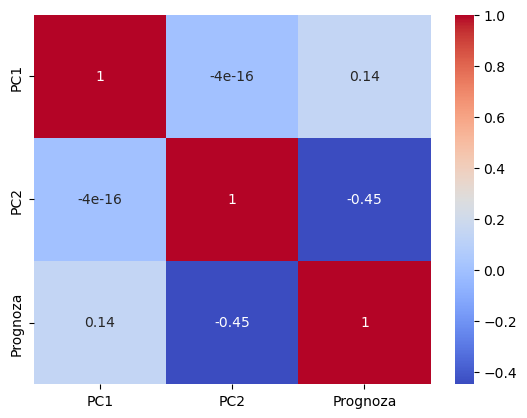

In [60]:
corr_matrix_diabetes_pca = diabetes_pca_df.corr()
sns.heatmap(corr_matrix_diabetes_pca, annot=True, cmap='coolwarm')

In [61]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42, stratify=y_pca)

In [62]:
print((y_test_pca == 0).sum())
print((y_test_pca == 1).sum())
print((y_train_pca == 0).sum())
print((y_train_pca == 1).sum())

150
81
350
187


#### <a name='81'></a> 8.1 Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową

In [63]:
models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), 
          SVC(random_state=42), xgb.XGBClassifier(random_state=42)]

for model in models:
    cv = StratifiedKFold(n_splits=5)
    model.fit(X_train_pca, y_train_pca)
    y_pred_train_pca = model.predict(X_train_pca)
    y_pred_train_pca_cv = cross_val_predict(model, X_train_pca, y_train_pca, cv=cv)
    y_pred_pca = model.predict(X_test_pca)

    model_name = type(model).__name__
    
  

    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("Czułość: ", format(recall_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("F1-score: ", format(f1_score(y_train_pca, y_pred_train_pca), '.4f'))
    
 
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_test_pca, y_pred_pca), '.4f'))
    print("Precyzja: ", format(precision_score(y_test_pca, y_pred_pca), '.4f'))
    print("Czułość: ", format(recall_score(y_test_pca, y_pred_pca), '.4f'))
    print("F1-score: ", format(f1_score(y_test_pca, y_pred_pca), '.4f'))

 
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:\n")
    print("Dokładność: ", format(accuracy_score(y_train_pca, y_pred_train_pca_cv), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_pca, y_pred_train_pca_cv), '.4f'))
    print("Czułość: ", format(recall_score(y_train_pca, y_pred_train_pca_cv), '.4f'))
    print("F1-score: ", format(f1_score(y_train_pca, y_pred_train_pca_cv), '.4f'))
    


WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  1.0000
Precyzja:  1.0000
Czułość:  1.0000
F1-score:  1.0000

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.6667
Precyzja:  0.5278
Czułość:  0.4691
F1-score:  0.4967

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.7374
Precyzja:  0.6420
Czułość:  0.5561
F1-score:  0.5960

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7412
Precyzja:  0.6765
Czułość:  0.4920
F1-score:  0.5697

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7273
Precyzja:  0.6552
Czułość:  0.4691
F1-score:  0.5468

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.7412
Precyzja:  0.6765
Czułość:  0.4920
F1-score:  0.5697

WYNIKI DLA MODELU SVC DLA DANYC

#### <a name='82'></a> 8.2  Dobór najlepszych hiperparametrów

In [64]:
models = [
    {
        'name': 'RF',
        'estimator': RandomForestClassifier(random_state=42),
        'hyperparameters': {
            'n_estimators': [50, 100, 150], 
            'max_depth': [5, 10, None], 
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'LR',
        'estimator': LogisticRegression(random_state=42),
        'hyperparameters': {
            'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10], 
            'solver': ['liblinear', 'saga']
        }
    },
    {
        'name': 'SVC',
        'estimator': SVC(random_state=42),
        'hyperparameters': {
            'C': [0.1, 1], 
            'kernel': ['linear', 'rbf'], 
            'gamma': [0.1, 1, 'scale']
        }
    },
    {
        'name': 'XGBoost',
        'estimator': xgb.XGBClassifier(random_state=42),
        'hyperparameters': {
            'learning_rate': [0.1, 0.3, 0.5],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 150]
        }
    }
]


for model in models:
    print(f"Model: {model['name']}")

    cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=cv)
    
    grid_search.fit(X_train_pca, y_train_pca)
    
    bestpca_model = grid_search.best_estimator_
    bestpca_model_name = f"bestpca_{model['name']}"
    globals()[bestpca_model_name] = bestpca_model
    
    print(f"Najlepsze parametry: {grid_search.best_params_}")
    print(f"Najlepszy wynik: {grid_search.best_score_}")
    print("____________________________________________________")


Model: RF
Najlepsze parametry: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Najlepszy wynik: 0.776497057805469
____________________________________________________
Model: LR
Najlepsze parametry: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Najlepszy wynik: 0.7411041883004501
____________________________________________________
Model: SVC
Najlepsze parametry: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Najlepszy wynik: 0.7485635167878159
____________________________________________________
Model: XGBoost
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Najlepszy wynik: 0.7597438560055382
____________________________________________________


#### <a name='83'></a> 8.3  Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli

In [65]:
models = [bestpca_RF, bestpca_LR, bestpca_SVC, bestpca_XGBoost]

for model in models:
    model.fit(X_train_pca, y_train_pca)
    y_pred_train_pca = model.predict(X_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    model_name = type(model).__name__

    print(f"WYNIKI DLA MODELU {model_name.upper()}\n\nDLA DANYCH TRENINGOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("Czułość: ", format(recall_score(y_train_pca, y_pred_train_pca), '.4f'))
    print("F1-score: ", format(f1_score(y_train_pca, y_pred_train_pca), '.4f'))
    
    
    print(f"\n\nDLA DANYCH TESTOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_test_pca, y_pred_pca), '.4f'))
    print("Precyzja: ", format(precision_score(y_test_pca, y_pred_pca), '.4f'))
    print("Czułość: ", format(recall_score(y_test_pca, y_pred_pca), '.4f'))
    print("F1-score: ", format(f1_score(y_test_pca, y_pred_pca), '.4f'))
    print("__________________________________________________________________")

    

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8138
Precyzja:  0.8425
Czułość:  0.5722
F1-score:  0.6815


DLA DANYCH TESTOWYCH:

Dokładność:  0.7100
Precyzja:  0.6250
Czułość:  0.4321
F1-score:  0.5109
__________________________________________________________________
WYNIKI DLA MODELU LOGISTICREGRESSION

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7412
Precyzja:  0.6765
Czułość:  0.4920
F1-score:  0.5697


DLA DANYCH TESTOWYCH:

Dokładność:  0.7273
Precyzja:  0.6552
Czułość:  0.4691
F1-score:  0.5468
__________________________________________________________________
WYNIKI DLA MODELU SVC

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7616
Precyzja:  0.7757
Czułość:  0.4439
F1-score:  0.5646


DLA DANYCH TESTOWYCH:

Dokładność:  0.7359
Precyzja:  0.7174
Czułość:  0.4074
F1-score:  0.5197
__________________________________________________________________
WYNIKI DLA MODELU XGBCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.8194
Precyzja:  0.8261
Czułość:


#### <a name='9'></a> 9. Modelowanie predykcyjne na zbiorze danych po zastosowaniu oversamplingu

In [66]:
diabetes_over

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              6               148              72                      35   
1              1                85              66                      29   
2              8               183              64                       0   
3              1                89              66                      23   
4              0               137              40                      35   
..           ...               ...             ...                     ...   
763           10               101              76                      48   
764            2               122              70                      27   
765            5               121              72                      23   
766            1               126              60                       0   
767            1                93              70                      31   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  Prognoza  
0                    0  33.6                        0.627    50         1  
1                    0  26.6                        0.351    31         0  
2                    0  23.3                        0.672    32         1  
3                   94  28.1                        0.167    21         0  
4                  168  43.1                        2.288    33         1  
..                 ...   ...                          ...   ...       ...  
763                180  32.9                        0.171    63         0  
764                  0  36.8                        0.340    27         0  
765                112  26.2                        0.245    30         0  
766                  0  30.1                        0.349    47         1  
767                  0  30.4                        0.315    23         0  

[768 rows x 9 columns]

<AxesSubplot:>

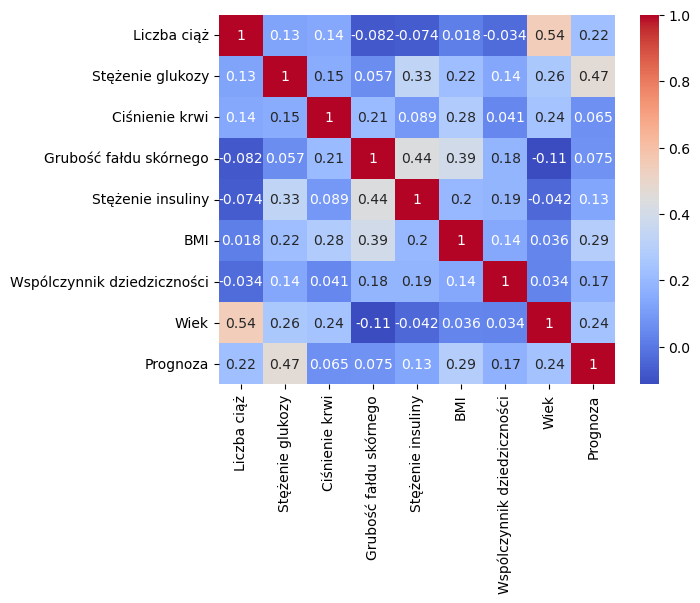

In [67]:
corr_matrix_diabetes_over = diabetes_over.corr()
sns.heatmap(corr_matrix_diabetes_over, annot=True, cmap='coolwarm')

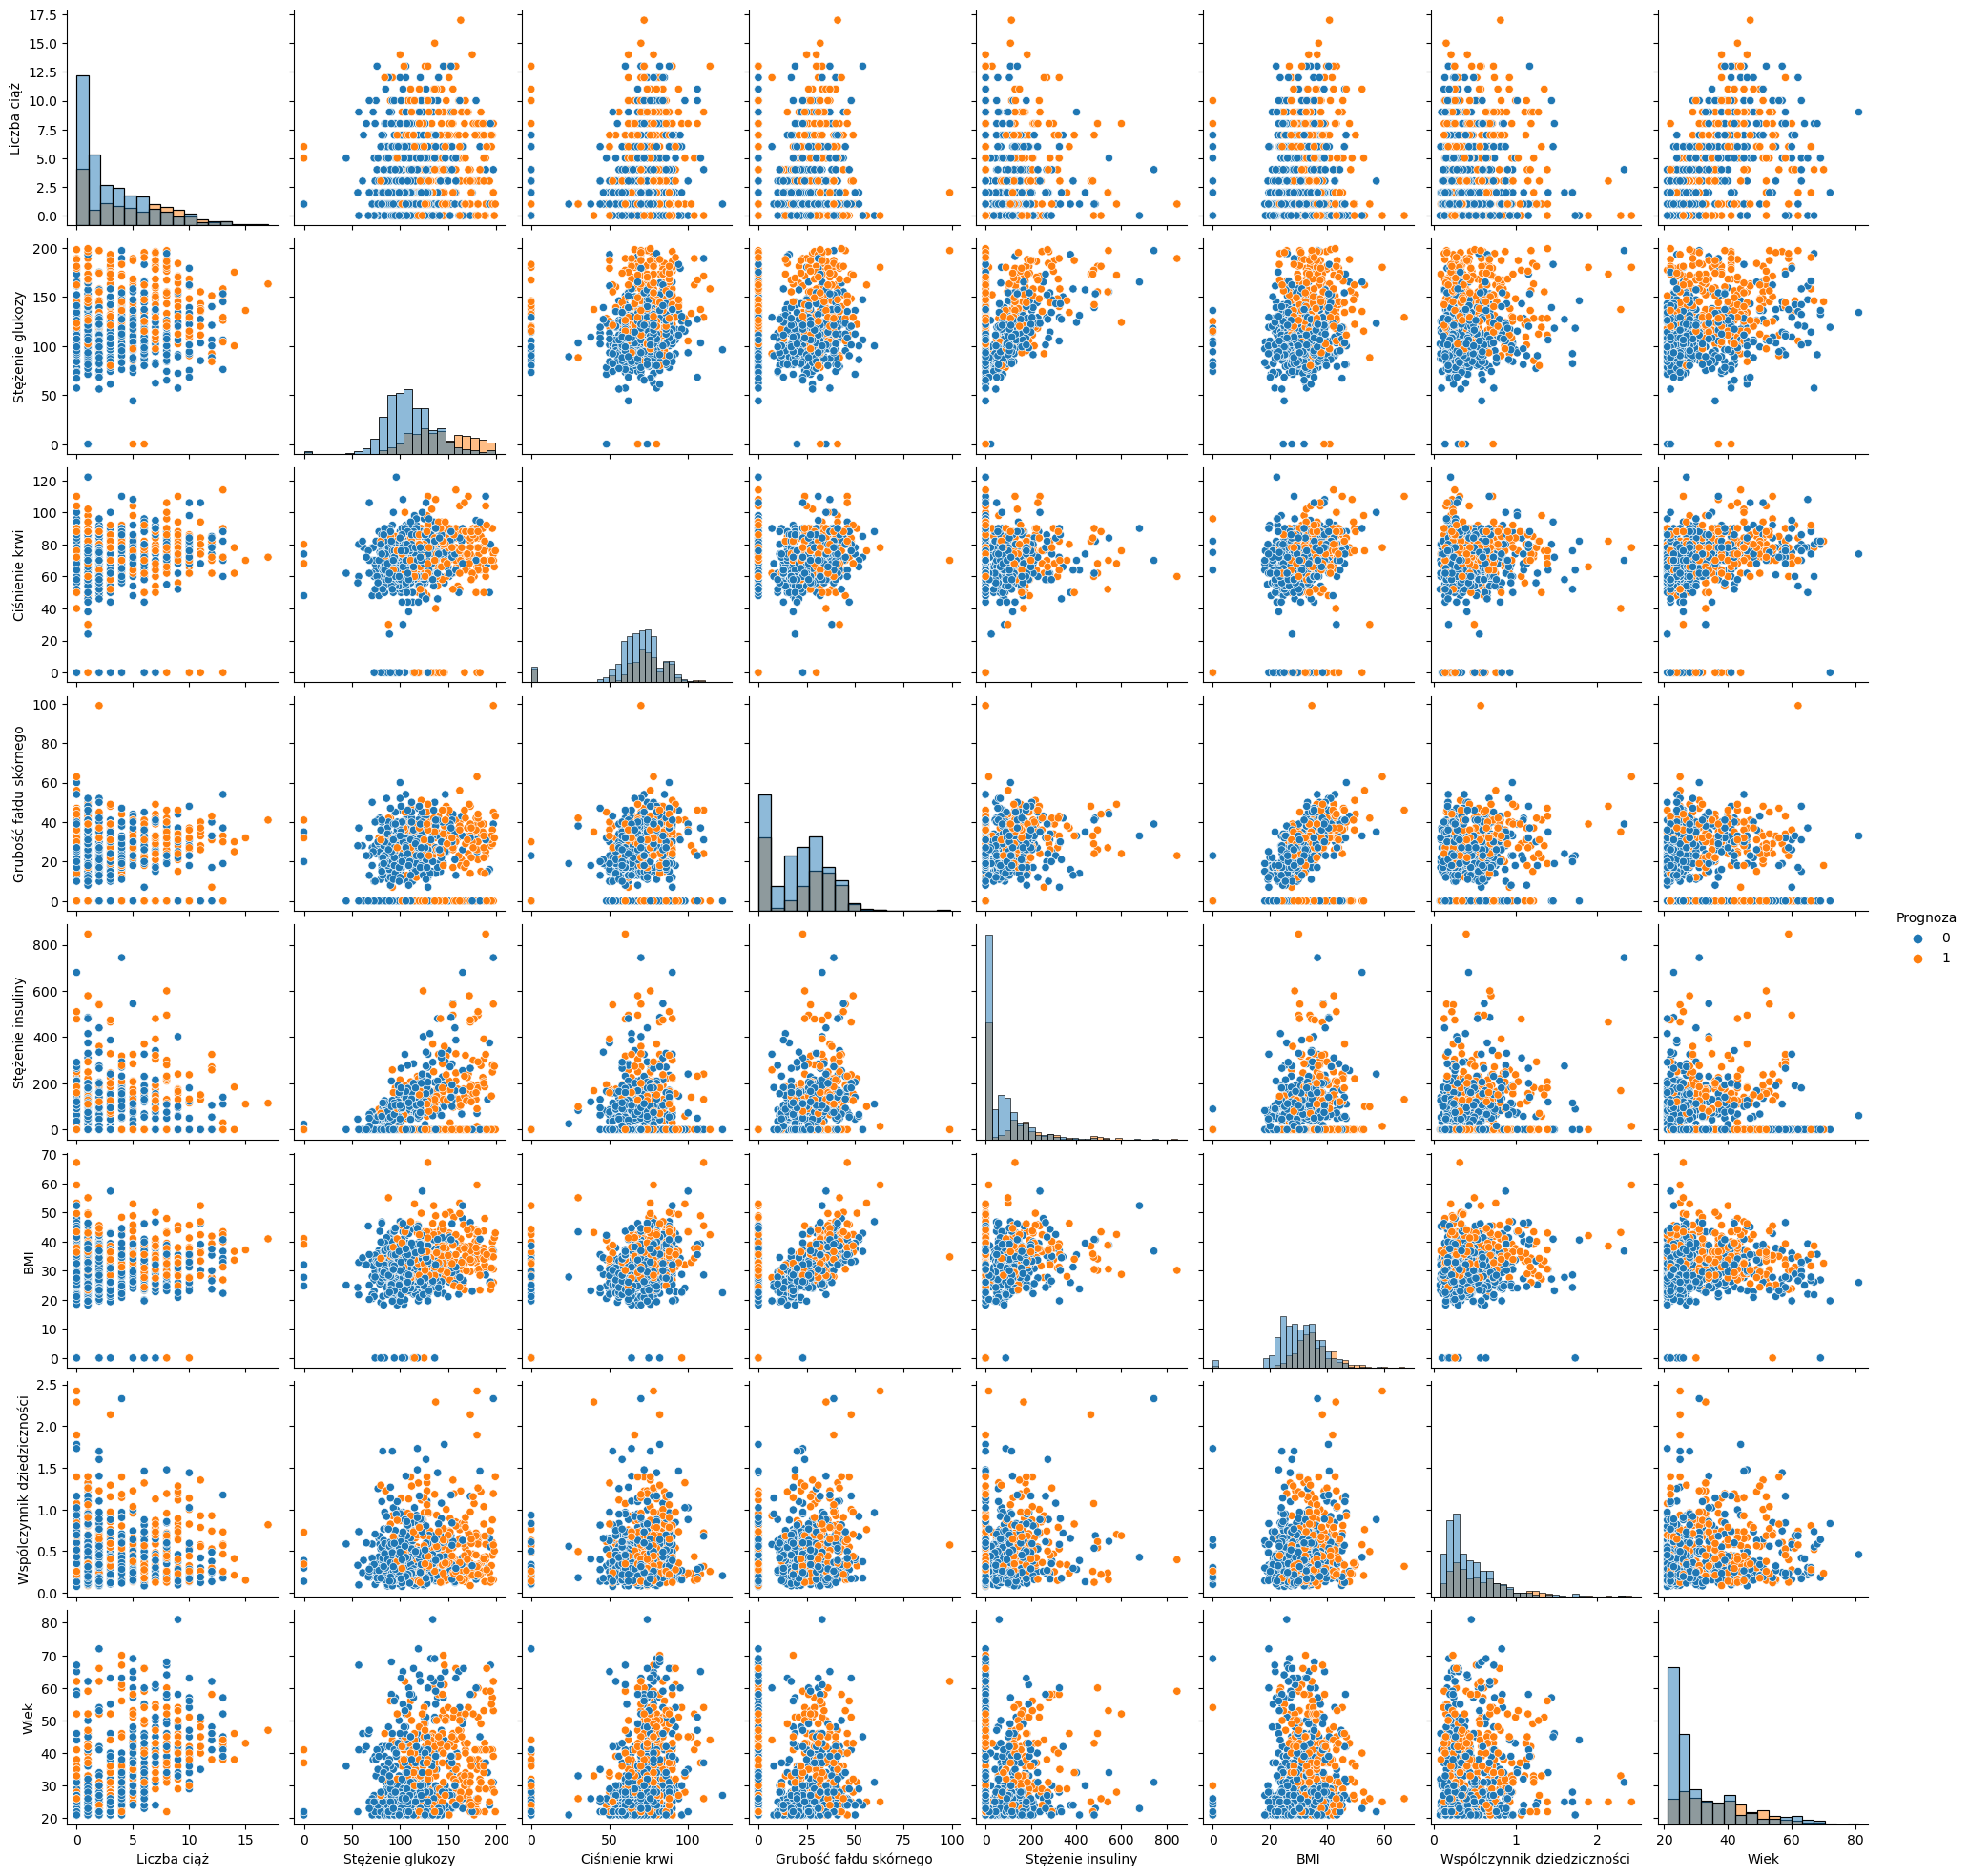

In [68]:
sns.pairplot(data=diabetes_over, vars=diabetes_over.columns[:-1], hue='Prognoza', diag_kind='hist')

In [69]:
corr_matrix_diabetes_over = diabetes_over.corr() 
corr_matrix_diabetes_over['Prognoza'].sort_values(ascending=False)

Prognoza                       1.000000
Stężenie glukozy               0.466581
BMI                            0.292695
Wiek                           0.238356
Liczba ciąż                    0.221898
Wspólczynnik dziedziczności    0.173844
Stężenie insuliny              0.130548
Grubość fałdu skórnego         0.074752
Ciśnienie krwi                 0.065068
Name: Prognoza, dtype: float64

In [70]:
X_o = diabetes_over.drop('Prognoza', axis=1)
y_o = diabetes_over['Prognoza']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.2, random_state=42, stratify=y_o)


In [71]:
X_test_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
44             7               159              64                       0   
672           10                68             106                      23   
700            2               122              76                      27   
630            7               114              64                       0   
81             2                74               0                       0   
..           ...               ...             ...                     ...   
32             3                88              58                      11   
637            2                94              76                      18   
593            2                82              52                      22   
425            4               184              78                      39   
273            1                71              78                      50   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  
44                   0  27.4                        0.294    40  
672                 49  35.5                        0.285    47  
700                200  35.9                        0.483    26  
630                  0  27.4                        0.732    34  
81                   0   0.0                        0.102    22  
..                 ...   ...                          ...   ...  
32                  54  24.8                        0.267    22  
637                 66  31.6                        0.649    23  
593                115  28.5                        1.699    25  
425                277  37.0                        0.264    31  
273                 45  33.2                        0.422    21  

[154 rows x 8 columns]

In [72]:
X_train_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
353            1                90              62                      12   
711            5               126              78                      27   
373            2               105              58                      40   
46             1               146              56                       0   
682            0                95              64                      39   
..           ...               ...             ...                     ...   
451            2               134              70                       0   
113            4                76              62                       0   
556            1                97              70                      40   
667           10               111              70                      27   
107            4               144              58                      28   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  
353                 43  27.2                        0.580    24  
711                 22  29.6                        0.439    40  
373                 94  34.9                        0.225    25  
46                   0  29.7                        0.564    29  
682                105  44.6                        0.366    22  
..                 ...   ...                          ...   ...  
451                  0  28.9                        0.542    23  
113                  0  34.0                        0.391    25  
556                  0  38.1                        0.218    30  
667                  0  27.5                        0.141    40  
107                140  29.5                        0.287    37  

[614 rows x 8 columns]

In [73]:
ros = RandomOverSampler(random_state=42)
X_train_o, y_train_o = ros.fit_resample(X_train_o, y_train_o)
diabetes_copy = pd.concat([X_train_o, y_train_o], axis=1)

In [74]:
X_train_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0              1                90              62                      12   
1              5               126              78                      27   
2              2               105              58                      40   
3              1               146              56                       0   
4              0                95              64                      39   
..           ...               ...             ...                     ...   
795            0               162              76                      36   
796            5               162             104                       0   
797            7               181              84                      21   
798            8               133              72                       0   
799            8               133              72                       0   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  
0                   43  27.2                        0.580    24  
1                   22  29.6                        0.439    40  
2                   94  34.9                        0.225    25  
3                    0  29.7                        0.564    29  
4                  105  44.6                        0.366    22  
..                 ...   ...                          ...   ...  
795                  0  49.6                        0.364    26  
796                  0  37.7                        0.151    52  
797                192  35.9                        0.586    51  
798                  0  32.9                        0.270    39  
799                  0  32.9                        0.270    39  

[800 rows x 8 columns]

In [75]:
X_test_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
44             7               159              64                       0   
672           10                68             106                      23   
700            2               122              76                      27   
630            7               114              64                       0   
81             2                74               0                       0   
..           ...               ...             ...                     ...   
32             3                88              58                      11   
637            2                94              76                      18   
593            2                82              52                      22   
425            4               184              78                      39   
273            1                71              78                      50   

     Stężenie insuliny   BMI  Wspólczynnik dziedziczności  Wiek  
44                   0  27.4                        0.294    40  
672                 49  35.5                        0.285    47  
700                200  35.9                        0.483    26  
630                  0  27.4                        0.732    34  
81                   0   0.0                        0.102    22  
..                 ...   ...                          ...   ...  
32                  54  24.8                        0.267    22  
637                 66  31.6                        0.649    23  
593                115  28.5                        1.699    25  
425                277  37.0                        0.264    31  
273                 45  33.2                        0.422    21  

[154 rows x 8 columns]

In [76]:
y_train_o.value_counts()[0]

400

In [77]:
y_train_o.value_counts()[1]

400

In [78]:
scaler = StandardScaler()
X_train_o_scaled = scaler.fit_transform(X_train_o)
X_train_o = pd.DataFrame(X_train_o_scaled, columns=X_train_o.columns)

X_test_o_scaled = scaler.transform(X_test_o)
X_test_o = pd.DataFrame(X_test_o_scaled, columns=X_test_o.columns)


In [79]:
X_test_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0       0.858020          1.041564       -0.326731               -1.305631   
1       1.736914         -1.779233        1.965637                0.117063   
2      -0.606803         -0.105354        0.328232                0.364488   
3       0.858020         -0.353336       -0.326731               -1.305631   
4      -0.606803         -1.593247       -3.819862               -1.305631   
..           ...               ...             ...                     ...   
149    -0.313838         -1.159278       -0.654212               -0.625212   
150    -0.606803         -0.973291        0.328232               -0.192218   
151    -0.606803         -1.345265       -0.981693                0.055207   
152    -0.020874          1.816508        0.437392                1.106764   
153    -0.899768         -1.686240        0.437392                1.787183   

     Stężenie insuliny       BMI  Wspólczynnik dziedziczności      Wiek  
0            -0.754795 -0.671797                    -0.599975  0.491552  
1            -0.299966  0.382794                    -0.627331  1.089704  
2             1.101648  0.434872                    -0.025502 -0.704750  
3            -0.754795 -0.671797                     0.731344 -0.021149  
4            -0.754795 -4.239178                    -1.183567 -1.046551  
..                 ...       ...                          ...       ...  
149          -0.253555 -1.010308                    -0.682043 -1.046551  
150          -0.142169 -0.124972                     0.479062 -0.961101  
151           0.312660 -0.528581                     3.670581 -0.790201  
152           1.816379  0.578088                    -0.691161 -0.277500  
153          -0.337095  0.083342                    -0.210914 -1.132001  

[154 rows x 8 columns]

In [80]:
X_train_o

Liczba ciąż  Stężenie glukozy  Ciśnienie krwi  Grubość fałdu skórnego  \
0      -0.899768         -1.097282       -0.435891               -0.563356   
1       0.272091          0.018637        0.437392                0.364488   
2      -0.606803         -0.632316       -0.654212                1.168620   
3      -0.899768          0.638593       -0.763372               -1.305631   
4      -1.192732         -0.942294       -0.326731                1.106764   
..           ...               ...             ...                     ...   
795    -1.192732          1.134557        0.328232                0.921195   
796     0.272091          1.134557        1.856477               -1.305631   
797     0.858020          1.723515        0.764873               -0.006650   
798     1.150985          0.235622        0.109911               -1.305631   
799     1.150985          0.235622        0.109911               -1.305631   

     Stężenie insuliny       BMI  Wspólczynnik dziedziczności      Wiek  
0            -0.355660 -0.697836                     0.269334 -0.875651  
1            -0.550586 -0.385365                    -0.159242  0.491552  
2             0.117733  0.304676                    -0.809703 -0.790201  
3            -0.754795 -0.372345                     0.220701 -0.448400  
4             0.219838  1.567581                    -0.381128 -1.046551  
..                 ...       ...                          ...       ...  
795          -0.754795  2.218563                    -0.387207 -0.704750  
796          -0.754795  0.669226                    -1.034629  1.516955  
797           1.027391  0.434872                     0.287571  1.431504  
798          -0.754795  0.044283                    -0.672924  0.406102  
799          -0.754795  0.044283                    -0.672924  0.406102  

[800 rows x 8 columns]

#### <a name='9'></a> 9. Trenowanie modeli na ustawieniach domyślnych z i bez walidacją krzyżową

In [81]:
models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), 
          SVC(random_state=42), xgb.XGBClassifier(random_state=42)]

for model in models:
    cv = StratifiedKFold(n_splits=5)
    model.fit(X_train_o, y_train_o)
    y_pred_train_o = model.predict(X_train_o)
    y_pred_train_o_cv = cross_val_predict(model, X_train_o, y_train_o, cv=cv)
    y_pred_o = model.predict(X_test_o)

    model_name = type(model).__name__
    
  

    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_train_o, y_pred_train_o), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_o, y_pred_train_o), '.4f'))
    print("Czułość: ", format(recall_score(y_train_o, y_pred_train_o), '.4f'))
    print("F1-score: ", format(f1_score(y_train_o, y_pred_train_o), '.4f'))
    
 
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:\n")
    print("Dokładność: ", format(accuracy_score(y_test_o, y_pred_o), '.4f'))
    print("Precyzja: ", format(precision_score(y_test_o, y_pred_o), '.4f'))
    print("Czułość: ", format(recall_score(y_test_o, y_pred_o), '.4f'))
    print("F1-score: ", format(f1_score(y_test_o, y_pred_o), '.4f'))

 
    print(f"\nWYNIKI DLA MODELU {model_name.upper()} DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:\n")
    print("Dokładność: ", format(accuracy_score(y_train_o, y_pred_train_o_cv), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_o, y_pred_train_o_cv), '.4f'))
    print("Czułość: ", format(recall_score(y_train_o, y_pred_train_o_cv), '.4f'))
    print("F1-score: ", format(f1_score(y_train_o, y_pred_train_o_cv), '.4f'))
    


WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  1.0000
Precyzja:  1.0000
Czułość:  1.0000
F1-score:  1.0000

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7208
Precyzja:  0.5965
Czułość:  0.6296
F1-score:  0.6126

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.8462
Precyzja:  0.8155
Czułość:  0.8950
F1-score:  0.8534

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TRENINGOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7600
Precyzja:  0.7694
Czułość:  0.7425
F1-score:  0.7557

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANYCH TESTOWYCH BEZ WALIDACJI KRZYZOWEJ:

Dokładność:  0.7338
Precyzja:  0.6032
Czułość:  0.7037
F1-score:  0.6496

WYNIKI DLA MODELU LOGISTICREGRESSION DLA DANEYCH TRENINGOWYCH Z WALIDACJĄ KRZYŻOWĄ:

Dokładność:  0.7388
Precyzja:  0.7481
Czułość:  0.7200
F1-score:  0.7338

WYNIKI DLA MODELU SVC DLA DANYC

#### <a name='92'></a> 9.2 Dobór najlepszych hiperparametrów

In [82]:
models = [
    {
        'name': 'RF',
        'estimator': RandomForestClassifier(random_state=42),
        'hyperparameters': {
            'n_estimators': [50, 100, 150], 
            'max_depth': [5, 10, None], 
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'LR',
        'estimator': LogisticRegression(random_state=42),
        'hyperparameters': {
            'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10], 
            'solver': ['liblinear', 'saga']
        }
    },
    {
        'name': 'SVC',
        'estimator': SVC(random_state=42),
        'hyperparameters': {
            'C': [0.1, 1, 10], 
            'kernel': ['linear', 'poly', 'rbf'], 
            'gamma': [0.1, 1, 'scale']
        }
    },
    {
        'name': 'XGBoost',
        'estimator': xgb.XGBClassifier(random_state=42),
        'hyperparameters': {
            'learning_rate': [0.1, 0.3, 0.5],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 150]
        }
    }
]


for model in models:
    print(f"Model: {model['name']}")

    cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(model['estimator'], param_grid=model['hyperparameters'], cv=cv)
    
    grid_search.fit(X_train_o, y_train_o)
    
    besto_model = grid_search.best_estimator_
    besto_model_name = f"besto_{model['name']}"
    globals()[besto_model_name] = besto_model
    
    print(f"Najlepsze parametry: {grid_search.best_params_}")
    print(f"Najlepszy wynik: {grid_search.best_score_}")
    print("____________________________________________________")


Model: RF
Najlepsze parametry: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Najlepszy wynik: 0.8525
____________________________________________________
Model: LR
Najlepsze parametry: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Najlepszy wynik: 0.7424999999999999
____________________________________________________
Model: SVC
Najlepsze parametry: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Najlepszy wynik: 0.8275
____________________________________________________
Model: XGBoost
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Najlepszy wynik: 0.8412499999999999
____________________________________________________


#### <a name='93'></a> 9.3 Trenowanie modeli na najlepszych hiperparametrach. Sprawdzenie wydajności modeli

In [83]:
models = [besto_RF, besto_LR, besto_SVC, besto_XGBoost]

for model in models:
    model.fit(X_train_o, y_train_o)
    y_pred_train_o = model.predict(X_train_o)
    y_pred_o = model.predict(X_test_o)
    model_name = type(model).__name__

    print(f"WYNIKI DLA MODELU {model_name.upper()}\n\nDLA DANYCH TRENINGOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_train_o, y_pred_train_o), '.4f'))
    print("Precyzja: ", format(precision_score(y_train_o, y_pred_train_o), '.4f'))
    print("Czułość: ", format(recall_score(y_train_o, y_pred_train_o), '.4f'))
    print("F1-score: ", format(f1_score(y_train_o, y_pred_train_o), '.4f'))
    
    
    print(f"\n\nDLA DANYCH TESTOWYCH:\n")
    print("Dokładność: ", format(accuracy_score(y_test_o, y_pred_o), '.4f'))
    print("Precyzja: ", format(precision_score(y_test_o, y_pred_o), '.4f'))
    print("Czułość: ", format(recall_score(y_test_o, y_pred_o), '.4f'))
    print("F1-score: ", format(f1_score(y_test_o, y_pred_o), '.4f'))
    print("__________________________________________________________________")

    
    

WYNIKI DLA MODELU RANDOMFORESTCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.9962
Precyzja:  0.9926
Czułość:  1.0000
F1-score:  0.9963


DLA DANYCH TESTOWYCH:

Dokładność:  0.7403
Precyzja:  0.6167
Czułość:  0.6852
F1-score:  0.6491
__________________________________________________________________
WYNIKI DLA MODELU LOGISTICREGRESSION

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.7638
Precyzja:  0.7755
Czułość:  0.7425
F1-score:  0.7586


DLA DANYCH TESTOWYCH:

Dokładność:  0.7338
Precyzja:  0.6032
Czułość:  0.7037
F1-score:  0.6496
__________________________________________________________________
WYNIKI DLA MODELU SVC

DLA DANYCH TRENINGOWYCH:

Dokładność:  0.9825
Precyzja:  0.9923
Czułość:  0.9725
F1-score:  0.9823


DLA DANYCH TESTOWYCH:

Dokładność:  0.7013
Precyzja:  0.5741
Czułość:  0.5741
F1-score:  0.5741
__________________________________________________________________
WYNIKI DLA MODELU XGBCLASSIFIER

DLA DANYCH TRENINGOWYCH:

Dokładność:  1.0000
Precyzja:  1.0000
Czułość:

#### <a name='10'></a> 10. Wnioski 

#### <a name='101'></a> 10.1 Podsumowanie wyników projektu

W ramach testów sparawdzono takie modele jak: RandomForestClassifier, LogisticRegression, SVC, XGBClassifier. 
Trenowanie każdego modelu wykonano na parametrach optymalnych dla modelu oraz domyślnych, z wykorzystaniem i bez walidacji krzyżowej. 
Dodatkowo sprawdzono opcję reducji ilości zmiennych które wykazywały najmniejszą korelację z wartością prognozowaną
oraz wykonano redukcją wymiarowości metodą PCA. 
Ze względu na dużą różnicę pomiędzy ilością wartości zerowych i jedności dla wartości prognozowanej wykonano oversampling danych.

Nie zaobserwowano znaczących różnic w dokałdności i precyzji pomiędzy zastosowanymi modelami i danymi wyjsciowymi a danymi na których wykonano redukcję wymiarowosci i oversampling. W przypadku czułości dane mieściły się w zakresie od około 0,5 - 0,7(dla regresji logistycznej) przy czym dla modelu SCV uczonego na parametrach domyslnych i bez kroswalidacji czułość wyniosła 0,8.  
F1 - score miescił się w zakresie 0,5 - 0,7, maksymalna wartość otrzymano dla modelu SVC uczonego bez kroswalidacji na paramertach domyslnych dla danych po overamplingu.  

Ponieważ zbiór danych jest niezbalansowany, dokładność na poziomie 0,7 może oznaczać, że model dobrze  klasyfikuje większość przypadków, ale wysoka dokładność może w tym przypadku być myląca, może też oznaczać że ma trudności z poprawnym rozpoznaniem przypadków cukrzycy, ponieważ model może klasyfikować większość przypadków jako osoby zdrowe.

Wykonanie oversamplingu równoważy dane, zwiększając liczbę przypadków z cukrzycą (klasa mniejszościowa),co pozwala modelom lepiej się ich nauczyć. W szczególności SVC i Logistic Regression odnotowały znaczną poprawę w czułości, ponieważ te modele lepiej radzą sobie z liniowymi rozdzielnościami danych, gdy klasy są bardziej zrównoważone.

Precyzja pozostała względnie stabilna, co oznacza, że model niekoniecznie dobrze, ale konsekwentnie radził sobie z rozróżnianiem rzeczywistych przypadków cukrzycy. Oznacza to, że liczba fałszywych alarmów (fałszywie pozytywnych) pozostawała stosunkowo stabilna. 

Brak poprawy po PCA sugeruje, że kluczowe cechy dla predykcji cukrzycy są dobrze zdefiniowane w oryginalnych danych. 


#### <a name='102'></a> 10.2 Wnioski z  wyników projektu

W przypadku danych medycznych, takich jak diagnoza cukrzycy, czułość jest szczególnie ważna,  
ponieważ chcemy jak najwięcej poprawnie zidentyfikować przypadków choroby.  
Wyniki pokazują, że oversampling jest skuteczną techniką poprawy czułości dla niezbalansowanych danych.
Precyzja i dokładność pozostały względnie stabilne, co sugeruje, że badane modele zachowywaly  
równowagę między rozpoznawaniem pozytywnych i negatywnych przypadków.
